### MatplotLib Architecture
* Backend layer (FigureCanvas, Renderer, Event)
    - Deals with rendering of plots to screen or files.
    - In Jupyter notebook we use inline back-end so matplotlib render plot in notebook
    - It has 3 built in abstract interface classes.
    - FigureCanvas: `matplotlib.backend_bases.FigureCanvas`Encompassses areas onto which the figure is drawn
    - Renderer: `matplotlib.backend_bases.Renderer`Knows how to draw on FigureCanvas
    - Event: `matplotlib.backend_bases.Event`Handlers user input such as keyboard strokes and mouse clicks
* Artist Layer (Artist):
    - Contains container such as Figure, Subplot and axes
    - Comprises of 1 main object `Artist`. Knows how to use the Renderer to draw on canvas.
    - Title, lines, tick_labels and images all correspond to individual Artist instances.
    - Primitive artist : line, rectangle, circle, text
    - Composite artist: Axis, Tick, Axes and Figure
        - Figure: Top level matplotlib object that contains all other things
        - Axes: Most of API plotting methods is defined
* Scripting Layer (pyplot):
    - Simplify access to Artist and Back-end layers.
    - Comprised mainly pyplot, a scripting interface that is lighter than Artist layer.

In [250]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [251]:
mpl.get_backend()

'nbAgg'

In [252]:
plt.style.use('classic')

* Using `plt.rc()` we can control global parameters govering fig_size, subplot spacing, colors, font size, grid style
```
plt.rc('figure', figsize=(10,10))
plt.rc('axes', )
plt.rc('xticks', )
plt.rc('yticks', )
plt.rc('grid', )
plt.rc('legend', )
font_option = {'family':'monospace', 'weight':'bold', 'size':'small'}
plt.rc('font', font_option)
```
* There is a config file matplotlibrc in matplotlib/mpl-data edit it and place it to home directory with name `.matplotlibrc`

In [253]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

* to change style for specific plot

```
with plt.style.context('stylename'):
    plot()
```

* When we use matplotlib interactively execute `%matplotlib` magic command

`%matplotlib notebook`
    - Interactive plots embedded within the notebook
`%notebook inline`
    - Static image of your plot embedded in the notebook.
* Limitation of inline is we can not change the figure once it is rendered. But using notebook option if figure is open(available) any modification will go to that figure. If not figure is available it will create new figure.

In [254]:
%matplotlib inline

* Now any cell within notebook that creates a plot will embed a PNG image of the resulting graphics.

-----------------

# Line plot

```
plt.plot(x = x_var, y = y_var, linewidth = num, linestyle='', color = '')
```
* `linestyle` can be,
    - solid
    - dashed
    - dashdot
    - dotted
* `color` can be,
     - color = 'blue'  # specify color by name
     - color = 'g' # short color code
     - color = '0.75' # grayscale between 0 and 1
     - color = '#FFDD44' # hex code RRGGBB 00 to FF
     - color =  (1.0,0.2,0.3) # RGB tuple, values 0 and 1
     - color = 'chartreuse' # all html color name supported
* Managing both line style and color at the same time. As a third positional argument,
    - `-g` solid green
    - `--c` dashed cyan
    - `-.k` dashdot black
    - `:r` dotted red

In [255]:
x = np.linspace(0,10,100)

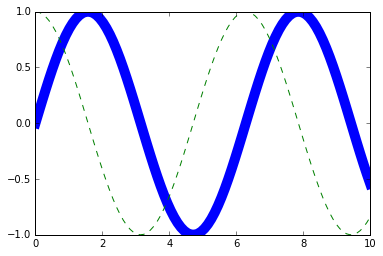

In [256]:
fig = plt.figure() # Created the figure, any changes or plot will reflect on it.
plt.plot(x, np.sin(x), linestyle='-', linewidth=10) # plt will plot in last created figure object
plt.plot(x, np.cos(x), linestyle='--')

* To save this image, use `fig.savefig('imageName')`
![save_image](images/save_image.jpg)

In [257]:
fig.savefig('my_pic.png')

* To load saved image in jupyter use,

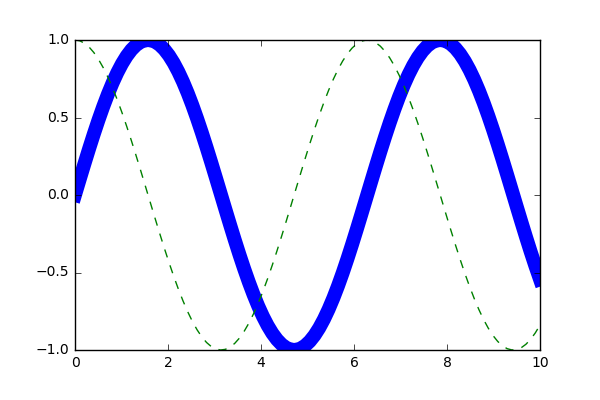

In [258]:
from IPython.display import Image
Image('my_pic.png')

* To get all supported file systems

In [259]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

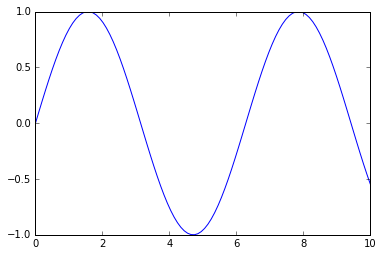

In [260]:
plt.plot(x, np.sin(x)) # figure and axes be created for us in background

### Two types of plotting
#### Scripting layer plotting (procedural method)
* Using pyplot or plt.
* We use plt to add elements by calling different methods like `plt.title`, `plt.xlabel`

#### Artist layer (object oriented method)
* Use `Axes` instance of current plot. We can add elements with little change in sysntax like `ax.set_title()` ``x.set_xlabel()`
* Useful with multiplot.

#### MATLAB like plotting syntax

* When we create a single plot using plt.plot,
    - A container for all plots is created (Figure object)
    - A container for plot was positioned on grid (axes object)
    - Visual symbols were added to the plot (using axes method)
* Figure has method to customize all the plots for example, overall width and height, spacing between the plot.
* We can create figure manually as, `fig = plt.figure()`
    - To change the dimension of figure use, `fig = plt.figure(figsize = (width, height))`
* After we create a figure, axes for a single plot containing no data is created within a context of figure. Axes object is acts like a container, for values on x-axis, y-axis, ticks of x and y axis. all visual symbols like markers, lines, gridlines.
* Plots are represented as instance of the axes class. but also referred to as subplots. To add new subplot to existing figure,
```
axes_obj = fig.add_subplot(nrows, ncols, plot_number)
```
* In matplotlib, the plot number starts at the top left position in the grid, moves through the remaining positions in that row, then jumps to the left-most plot in the second row, and so forth.
![](images/subplot_grid.png)

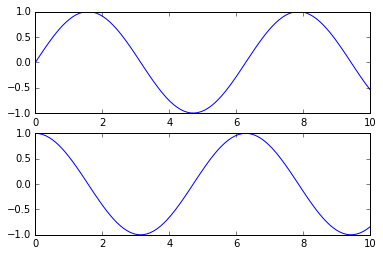

In [261]:
plt.figure() # Create a plot figure

# Create the first of 2 panels and set current axis
plt.subplot(2,1,1) # Rows,column and pannel number
plt.plot(x, np.sin(x))

plt.subplot(2,1,2)
plt.plot(x, np.cos(x))

* Here matplotlib keeps track of current figure and axes, all changes will apply there.

In [262]:
plt.gcf() # get current figure

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

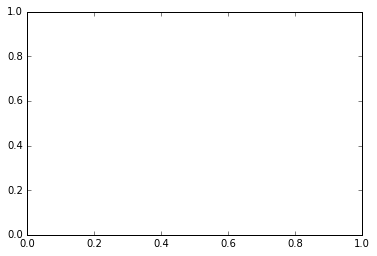

In [263]:
plt.gca() # get current axis

* `plt.sca(ax)` set current axis

* Using MATLAB there is one diadvantage, when we switch to second subplot, it is hard to go and change first one directly.

* One way to overcome that problem is 

![](images/direct_plotting.PNG)

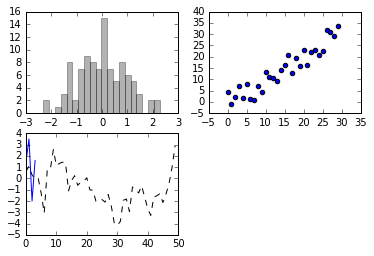

In [264]:
fig = plt.figure() # creating blank figure
# creating subplot, figure is 2 x 2. so up to four subplots in total, and we are plotting first subplot
ax1 = fig.add_subplot(2,2,1) 
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
# below plot will be plotted on last created plot/subplot
plt.plot([1.5,3.5,-2,1.6]) # blue plot
plt.plot(np.random.randn(50).cumsum(), 'k--') # k-- means black dashed line
# Plot on other subplot explicitly

ax1.hist(np.random.randn(100), bins = 20, color = 'k', alpha = 0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

#### Object oriented style
* Plotting function are explicit figure and axes objects

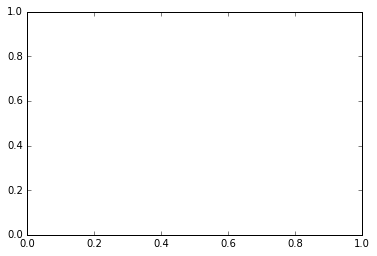

In [265]:
fig, ax = plt.subplots() # Creates single subplot and return both figure and axis

OrderedDict([('left', <matplotlib.spines.Spine object at 0x000002A29C9EC278>), ('right', <matplotlib.spines.Spine object at 0x000002A29C9EC390>), ('bottom', <matplotlib.spines.Spine object at 0x000002A29C9EC4A8>), ('top', <matplotlib.spines.Spine object at 0x000002A29C9EC5C0>)])


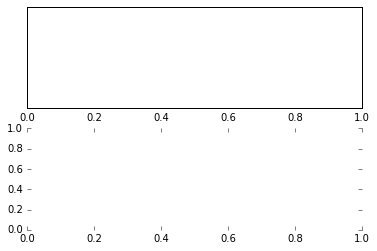

In [116]:
fig, ax = plt.subplots(2) 

# Let's get rid of ticks from all 4 sides
ax[0].tick_params(bottom=False, top=False, left=False, right=False,
                  labelleft=False, labelbottom=True)

# Lets get rid of spines
print(ax[1].spines)

ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)

# another easy way is
for side in ax[1].spines: # iterate on keys of orderedDict
    ax[1].spines[side].set_visible(False)

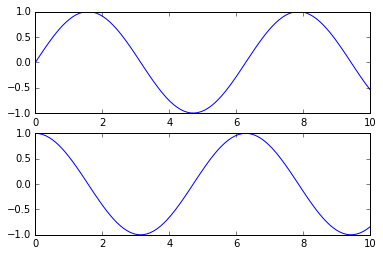

In [117]:
fig, ax = plt.subplots(2,1) # 2 rows and 1 column

ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

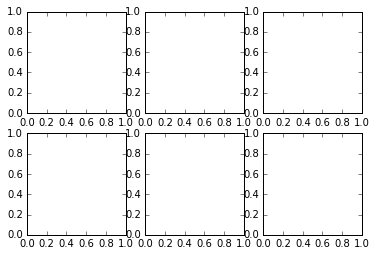

In [118]:
fig, axes = plt.subplots(2,3) # return numpy array containing subplot objects
# To adjust spacing between subplots
fig.subplots_adjust(left =None, bottom=None, right=None, top=None, wspace=None, hspace=None)

* Using `sharey` and `sharex` we can indicate subplots have the same X or Y axis. Useful to compare data on same scale.

![pylot subplot](images/pyplot_subplot.jpg)

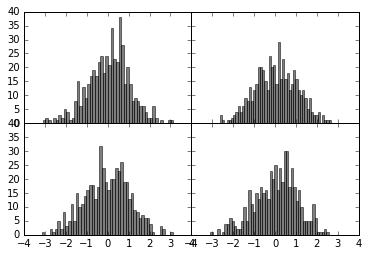

In [119]:
fig, axes = plt.subplots(2, 2, sharex = True, sharey = True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins = 50, color = 'k', alpha = 0.5)
fig.subplots_adjust(wspace = 0, hspace = 0)

### Multiple subplot
#### `plt.axes`
* By default creates standard axes object that fills entire figure.
* Optional argument [bottom, left, width, height] ranges from 0 to 1

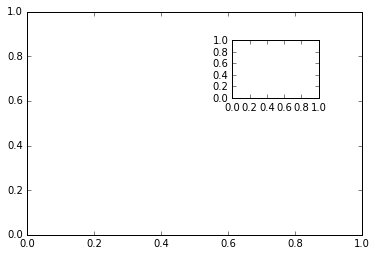

In [120]:
ax1 = plt.axes()
ax2 = plt.axes([0.6,0.6,0.2,0.2])

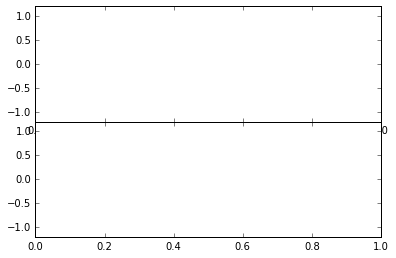

In [121]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.5,0.8,0.4], ylim=(-1.2,1.2))
ax2 = fig.add_axes([0.1,0.1,0.8,0.4], ylim=(-1.2,1.2))

#### `plt.GridSpec`

In [122]:
grid = plt.GridSpec(2,3, wspace=0.4, hspace=0.3)

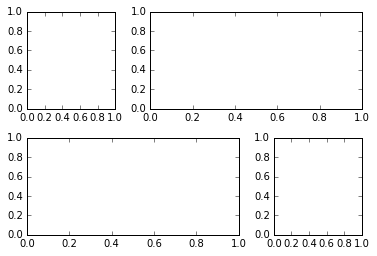

In [123]:
plt.subplot(grid[0,0])
plt.subplot(grid[0,1:])
plt.subplot(grid[1,:2])
plt.subplot(grid[1,2])

### Axis limits and annotations and Labels and Legends

(-1.5, 1.5)

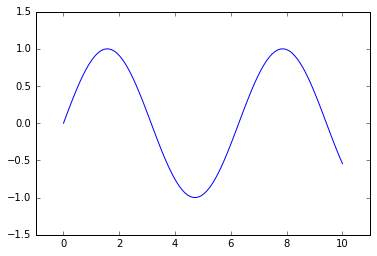

In [124]:
plt.plot(x, np.sin(x))
plt.xlim(-1,11)
plt.ylim(-1.5,1.5) # x, y coordinate, text

* Axis in reverse order

(1.2, -1.2)

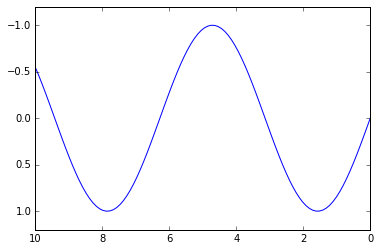

In [125]:
plt.plot(x, np.sin(x))
plt.xlim(10,0)
plt.ylim(1.2,-1.2)

* `plt.axis()` allows to set x and y limits in same call

[-1, 11, -1.5, 1.5]

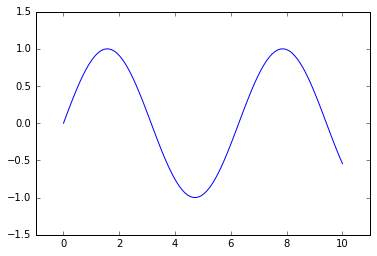

In [126]:
plt.plot(x, np.sin(x))
plt.axis([-1,11,-1.5,1.5])

(0.0, 10.0, -0.9993845576124357, 0.9996923408861117)

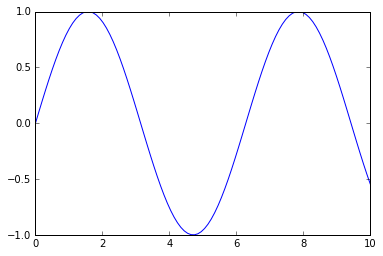

In [127]:
plt.plot(x, np.sin(x))
plt.axis('tight') # tighten the bound around current plot

* `text` method of subplot will draw text at given coordinates (x,y) on the plot with optional styling.
```
ax.text(x,y, 'Hello world', family = 'monospace', fontsize = 10)
```

Text(4, -1.7, 'sin curve')

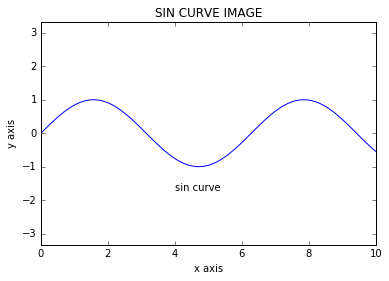

In [128]:
plt.plot(x, np.sin(x))
plt.axis('equal')# equal aspect ration, one unit in x equal 1 unit in y
# axis('off') turns off axis lines, labels
# axis("equal") equal scalling of x and y
# axis("square") forces square plot
# axis('tight') set xlim() and ylim() to show all data
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title("SIN CURVE IMAGE") # pyplot maintains internal state, so it knows to which plot we are refering to.
plt.text(4,-1.7,"sin curve")

* Another way to place text at coordinate is,
    - `ax.transData` : Associated with data coordinate. transData coordinate gives the usual data coordinates associated with the x and y axis label
    - `ax.transAxes` : Associated with axes (in units of axes dimension). transAxes coordinates give the location from the bottom left corner of the axes as a fraction of axis size
    - `fig.transFigure` : Associated with figure (in units of figure dimension) transFigure coordinates is position from the bottom left of the figure as fraction of the figure size.
* Changing xlim and ylim  will affect transData not others.

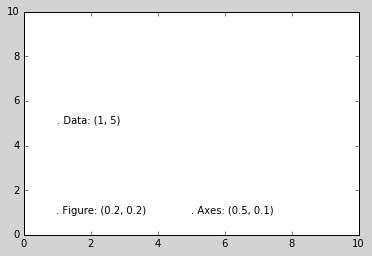

In [129]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])
# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

* Text labels and arrows using `annotate()` method.
* Flexible specification of coordinates

* Legend is used when multiple line are shown in same plot. Legend label each line.

Text(8, -3, 'cos with arrow')

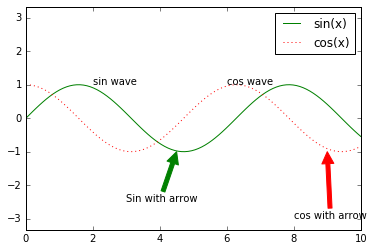

In [130]:
plt.plot(x, np.sin(x), '-g', label = 'sin(x)')
plt.plot(x, np.cos(x), ':r', label = 'cos(x)')
plt.axis('equal')
plt.legend(loc="best")
# loc can be "upper left","upper center","upper right", "center left", "center", "center right",
# "lower left", "lower center", "lower right", "best" , "right"

plt.annotate('sin wave', xy=(2,1))
plt.annotate('cos wave', xy=(6,1))
# it is chart junk but just for learning purpose.
# s = text of label, xy = coordinate to annotate(end point of arrow), 
# xytext=coordinates of label (start point of arrow)
# arrowprops = control drawing arrow, 
    # arrowstyle: 
    # connectionStyle : specify connection type (arc3 is straight line)
    # color : Specifies color of arrow
    # lw : pecifies the line width
# xycoords : coordinate system that xy is given in
# arrow will point to location given by xy
plt.annotate('Sin with arrow', xy=(4.5,-1), xytext=(3,-2.5), arrowprops = {'color':'green'})
plt.annotate('cos with arrow', xy=(9,-1), xytext=(8,-3), arrowprops={'color':'red'})

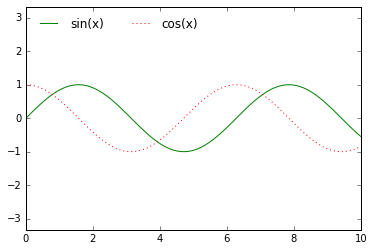

In [131]:
plt.plot(x, np.sin(x), '-g', label = 'sin(x)')
plt.plot(x, np.cos(x), ':r', label = 'cos(x)')
plt.axis('equal')
plt.legend(loc="upper left", frameon=False, ncol = 2)

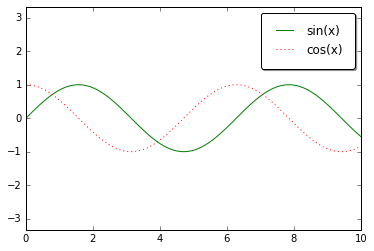

In [132]:
plt.plot(x, np.sin(x), '-g', label = 'sin(x)')
plt.plot(x, np.cos(x), ':r', label = 'cos(x)')
plt.axis('equal')
plt.legend(fancybox = True, framealpha=1, shadow=True, borderpad=1)

* Above function can be used with axes also.
    - plt.xlabel() as ax.set_xlabel()
    - plt.ylabel() as ax.set_ylabel()
    - plt.xlim() as ax.set_xlim()
    - plt.ylim() as ax.set_ylim()
    - plt.title() as ax.set_title()
    - plt.plot() as ax.plot()
    - plt.legend() as ax.legend()
* We can use ax.set() directly

[(-2, 2),
 Text(0, 0.5, 'sin(x)'),
 (0, 10),
 Text(0.5, 0, 'x'),
 Text(0.5, 1.0, 'A simple plot')]

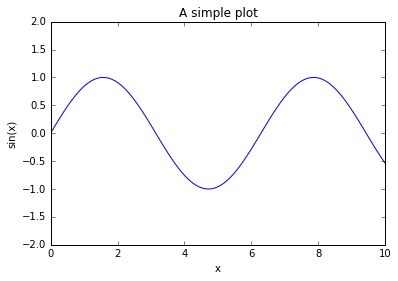

In [133]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim = (0,10), ylim= (-2,2), xlabel = 'x', ylabel = 'sin(x)',
      title= 'A simple plot')

* `xlim` : plot range
* `xticks`: tick location
* `xticklabels` : tick labels
* Calling without parameter like `plt.xlim()` returns current x-axis plotting range
* Calling with parameter set new values.

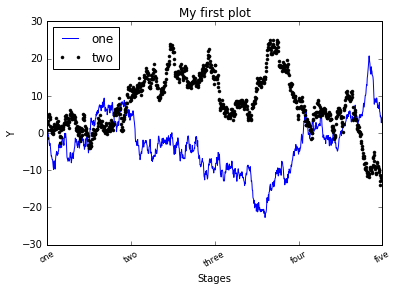

In [134]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum(), label ='one')
ax.set_xticks([0,250,500,750,1000])
ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation = 30, fontsize = 'small')
ax.set_xlabel('Stages')
ax.set_title("My first plot")
# Another way
props = {
    'title': 'My first plot',
    'ylabel': 'Y'
}
ax.set(**props) 
ax.plot(np.random.randn(1000).cumsum(), 'k.', label = 'two')
ax.legend(loc = 'best')


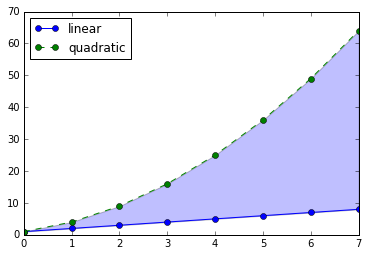

In [135]:
linear_data = np.array([1,2,3,4,5,6,7,8])
plt.plot(linear_data, '-o')
plt.plot(linear_data**2, '--o')
plt.legend(['linear','quadratic'], loc= 'best')
plt.fill_between(range(len(linear_data)), linear_data, linear_data**2,
                 facecolor='blue', alpha=0.25)

### Customizing ticks
* Within each axis there is major and minor ticks
* Every tick has property like locations and labels.
* Using formatter and locator object of each axis we can customize label and location

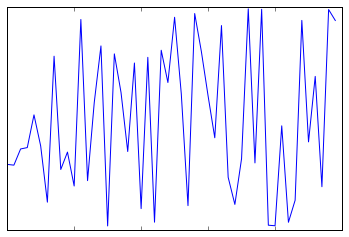

In [136]:
fig,ax = plt.subplots()
ax.plot(np.random.rand(50))
ax.yaxis.set_major_locator(plt.NullLocator()) # hiding ticks
ax.xaxis.set_major_formatter(plt.NullFormatter()) # hiding labels

### Reducing/Increasing number of ticks

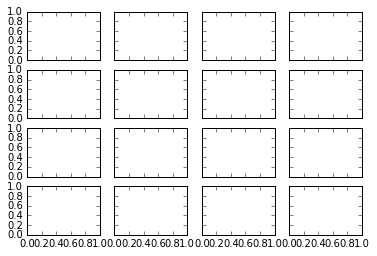

In [137]:
fig, ax = plt.subplots(4,4, sharex=True, sharey=True)

* Using `plt.MaxLocator()` which allows us to specify maximum number of ticks that will be displayed

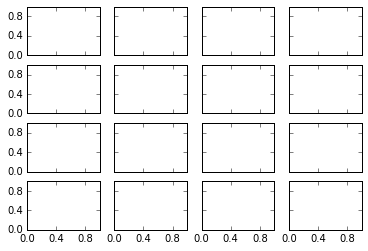

In [138]:
fig, ax = plt.subplots(4,4, sharex=True, sharey=True)
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))

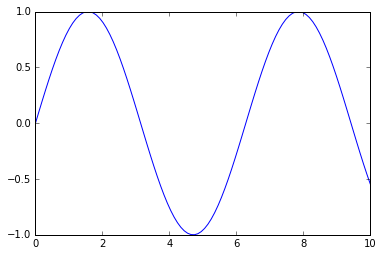

In [139]:
a = np.linspace(0,3*np.pi,1000)
fig,ax = plt.subplots()
ax.plot(x, np.sin(x))

* `plt.MultipleLocator` locates ticks at multiple of provided number

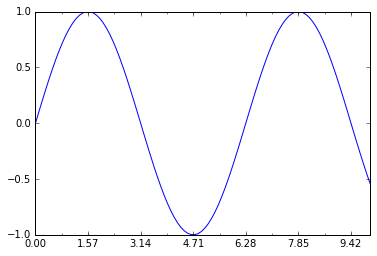

In [140]:
a = np.linspace(0,3*np.pi,1000)
fig,ax = plt.subplots()
ax.plot(x, np.sin(x))
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi/4))

### Add Shape to subplot

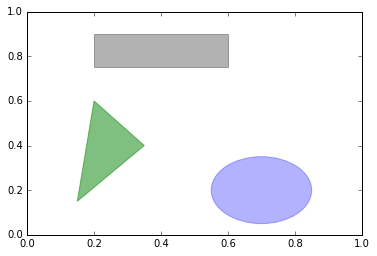

In [141]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
rect = plt.Rectangle((0.2,0.75), 0.4,0.15,color = 'k', alpha = 0.3)
circ = plt.Circle((0.7,0.2),0.15,color = 'b', alpha = 0.3)
poly = plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]], color = 'g', alpha = 0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(poly)

* Pandas also integrate matplotlib, so we can plot efficiently and fast

In [145]:
immigrants = pd.read_excel("Canada.xlsx",
                          sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)

In [146]:
immigrants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
Type        195 non-null object
Coverage    195 non-null object
OdName      195 non-null object
AREA        195 non-null int64
AreaName    195 non-null object
REG         195 non-null int64
RegName     195 non-null object
DEV         195 non-null int64
DevName     195 non-null object
1980        195 non-null int64
1981        195 non-null int64
1982        195 non-null int64
1983        195 non-null int64
1984        195 non-null int64
1985        195 non-null int64
1986        195 non-null int64
1987        195 non-null int64
1988        195 non-null int64
1989        195 non-null int64
1990        195 non-null int64
1991        195 non-null int64
1992        195 non-null int64
1993        195 non-null int64
1994        195 non-null int64
1995        195 non-null int64
1996        195 non-null int64
1997        195 non-null int64
1998        195 non-null int64
1999        195 non-n

In [147]:
immigrants.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [148]:
immigrants.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


* Clean up data

In [149]:
immigrants.drop(['Coverage', 'Type','AREA','REG','DEV'], axis=1, inplace=True)

In [150]:
immigrants.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'}, 
                  inplace=True)

In [151]:
immigrants.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [152]:
immigrants['Total'] = immigrants.sum(axis=1)

In [153]:
immigrants.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699


In [154]:
immigrants.set_index('Country', inplace=True)

In [155]:
immigrants.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


In [156]:
immigrants.columns = list(map(str, immigrants.columns))

In [157]:
years = list(map(str, range(1980,2014)))

In [158]:
haiti = immigrants.loc['Haiti', years]
haiti.head(2)

1980    1666
1981    3692
Name: Haiti, dtype: object

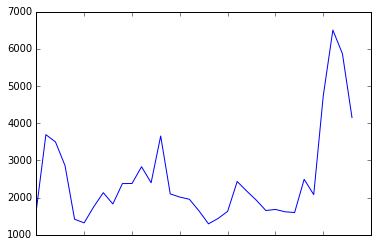

In [159]:
haiti.plot(kind='line')

* Years is not displayed, as it is Object (string) type.

In [160]:
haiti.index = haiti.index.map(int)
haiti.index

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013],
           dtype='int64')

* Series object's index in used as x-axis, disable with `use_index = False`

Text(2000, 6000, 'Major earthquake')

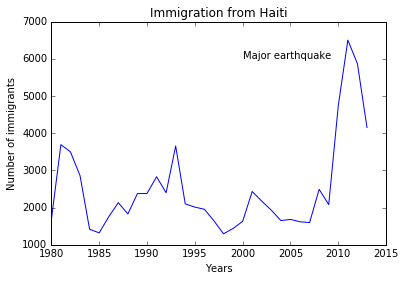

In [161]:
haiti.plot(kind = 'line')
plt.title('Immigration from Haiti')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.ticklabel_format(useOffset=False) # Turn off scientific axis ticks
plt.text(2000,6000, "Major earthquake")

In [162]:
immigration_china_india = immigrants.loc[['China', 'India'], years]

In [163]:
immigration_china_india.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


In [164]:
immigration_china_india.columns = immigration_china_india.columns.map(int)

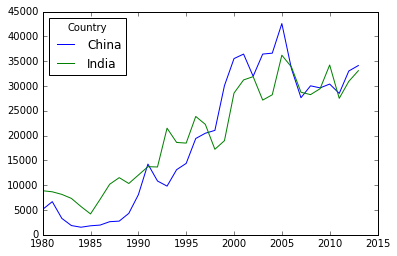

In [165]:
immigration_china_india.T.plot(kind = 'line')
plt.ticklabel_format(useOffset=False)

![](images/plot_Argument.jpg)
![](images/dataframe_plot.jpg)

```
df.plot(kind = 'scatter', x = 'col_name1', y = 'col_name2', title = "My plot", figsize = (5,10))
```

* We can even access underlying matplotlib axes object, 

```
ax = df.plot(kind = 'scatter', x = 'col_name1', y = 'col_name2', title = "My plot", figsize = (5,10))
```


------------
# Area plot / Stacked Line Plot
* Represent cumulated totals using numbers or percentages over time. Based on line plot.
* Used to compare 2 or more quantity.

* Visualize highest 5 countries with immigration in canada.

In [166]:
high = immigrants.sort_values('Total',ascending=False)[:5]

In [167]:
high

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [168]:
high.rename(index={'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'},
           inplace=True)
high = high[years]
high.columns = high.columns.map(int)

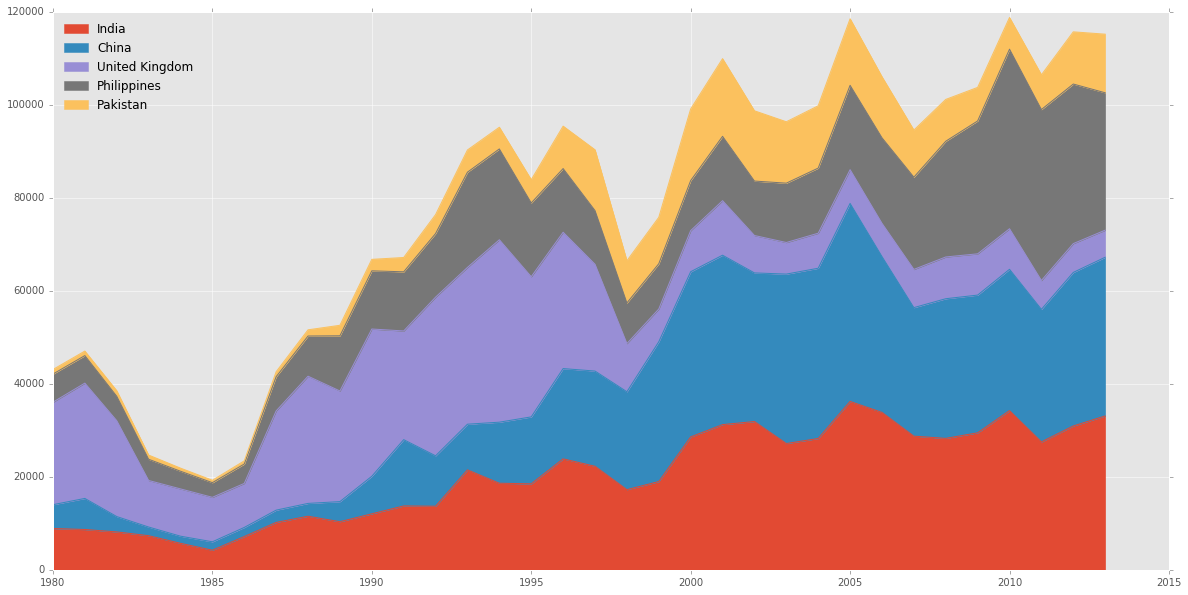

In [169]:
plt.style.use('ggplot')
high.T.plot(kind='area', figsize = (20,10))
plt.legend(loc='upper left', framealpha = 0.0)
plt.ticklabel_format(useOffset=False)

* To produces unstacked plot

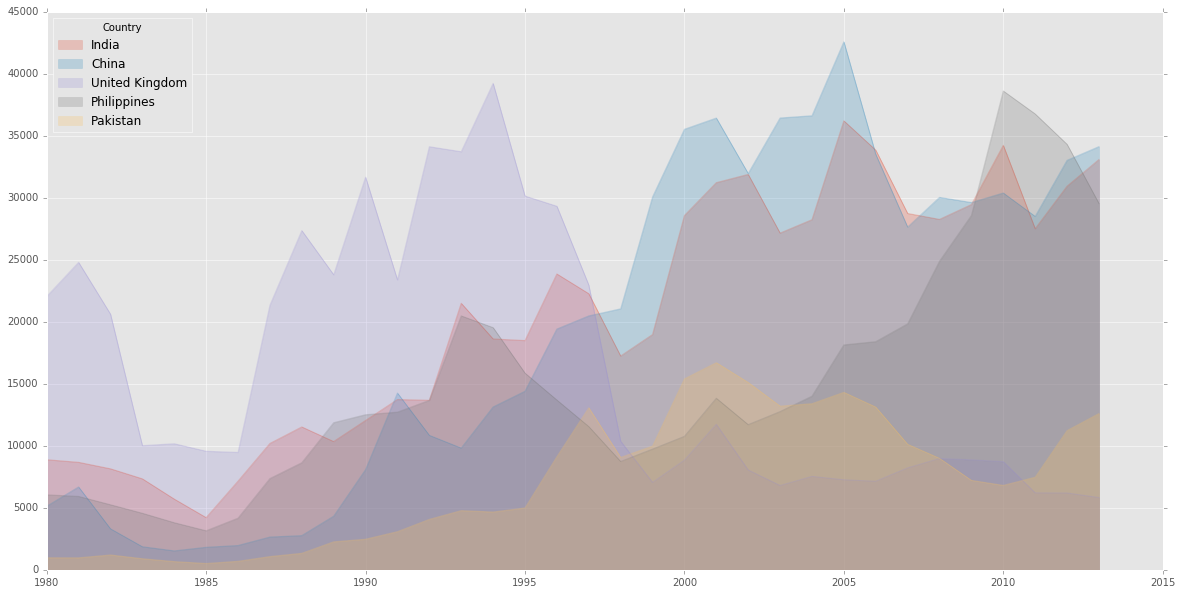

In [170]:
high.T.plot(kind='area', figsize=(20,10), stacked =False, alpha=0.25) # stacked plot has default transparency of 0.5
plt.ticklabel_format(useOffset=False)

-------------------

# Scatter Plot

### Scatter plot with plt.plot

In [171]:
x = np.linspace(0,10,30)
y = np.sin(x)

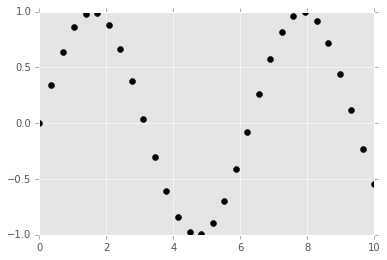

In [172]:
plt.plot(x,y, 'o', color='black')

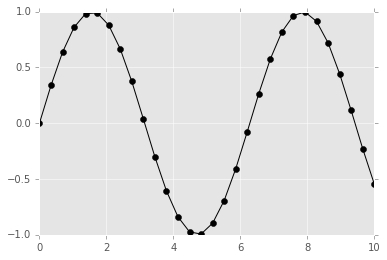

In [173]:
plt.plot(x,y, '-ok')

(-1.2, 1.2)

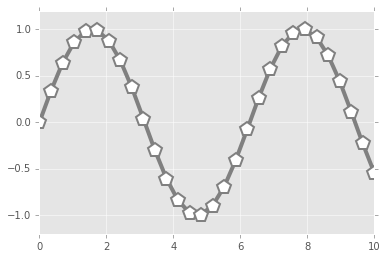

In [174]:
plt.plot(x, y, '-p', color = 'gray', markersize = 15, linewidth = 4, markerfacecolor = 'white',
        markeredgecolor = 'gray', markeredgewidth = 2)
plt.ylim(-1.2,1.2)

### Scatter plot using plt.scatter

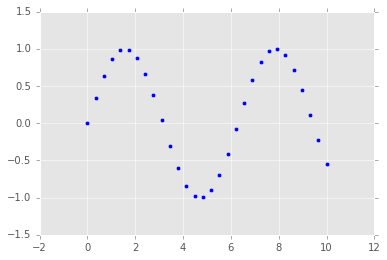

In [175]:
plt.scatter(x,y,marker='o')

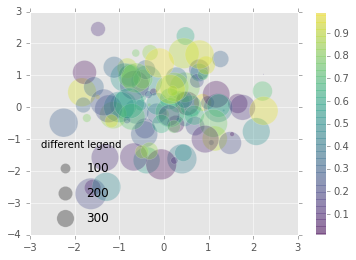

In [176]:
x = np.random.randn(100)
y = np.random.randn(100)
colors = np.random.rand(100)
sizes = 1000 * np.random.rand(100)

plt.scatter(x, y, c = colors, s = sizes, alpha = 0.3, cmap = 'viridis')
plt.colorbar()

# Create legend with empty list with desired size and label
for area in [100,200,300]:
    plt.scatter([],[], c = 'k', alpha=0.3,s=area, label=str(area))
plt.legend(loc = 'lower left',scatterpoints=1, frameon=False, labelspacing=1, title= 'different legend')


* Legend can only reference some object that is on the plot, so we fake it by plotting empty list. Legend can only lists plot elements that have a label specified.

* Difference between `plt.plot` and `plt.scatter` is, in `plt.scatter` we can color, size individual data point.

In [177]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

Text(0, 0.5, 'sepal width (cm)')

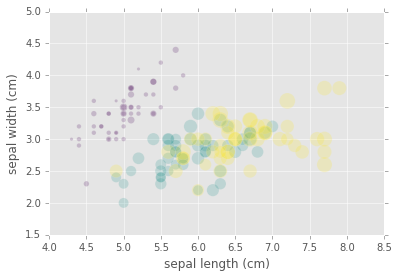

In [178]:
plt.scatter(features[0], features[1], alpha = 0.2, s = 100*features[3], c = iris.target, cmap = 'viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

* (x,y) location of each point corresponds to the sepal length and width. Size of the point is related to petal width. and color is related to the particular species of flower.
* For large dataset plt.plot is way more faster than plt.scatter, as in plt.scatter, each point is constructed individually, whereas in plt.plot each point is clone of each other.
* When we generate multiple scatter plot, to compare them we want same ranges in x and y axis. By default matplotlib will choose range such that all data can be displayed.
* `ax.set_xlim(0,5)` and `ax.set_ylim(0,5)` is used to set data limit for both axes.
* We can even use this methods to zoom in specific part of plot.

* To change the scale of an x-axis

`plt.xscale('log')`

* Let's plot immigration data year vs total population

In [179]:
df_tot = immigrants[years].sum(axis=0)
df_total = df_tot.reset_index()
df_total.columns = ['Year', 'Total']
df_total['Year'] = df_total['Year'].astype(int)

In [180]:
df_total.head()

,Year,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


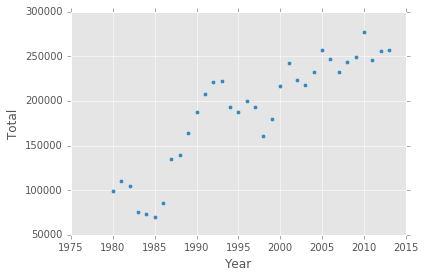

In [181]:
df_total.plot.scatter(x = 'Year', y = 'Total')
plt.ticklabel_format(useOffset=False)

* We can also plot regression line manually.
* First get equation of best line fit.

In [182]:
fit = np.polyfit(df_total.Year, df_total.Total, deg = 1)
# defgree of fitting polynomial 1 for linear 2 for quadratic
fit

array([ 5.56709228e+03, -1.09261952e+07])

* Here at 0 index we got slope and at 1st index we got y intercept.

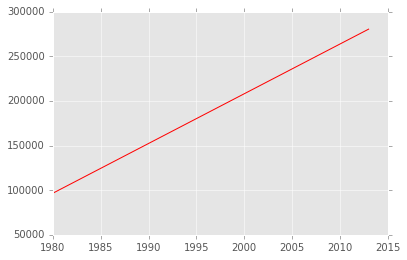

In [183]:
plt.plot(df_total.Year, fit[0] * df_total.Year + fit[1], color = 'red')
plt.ticklabel_format(useOffset=False)

* Let's combine both

Text(2000, 150000, 'y = 5567*x + -10926195')

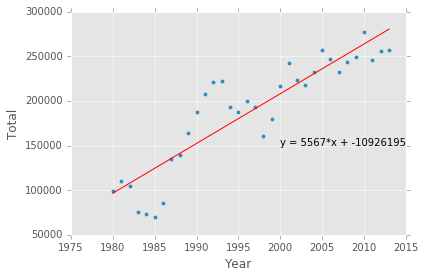

In [184]:
df_total.plot.scatter(x = 'Year', y = 'Total')
plt.ticklabel_format(useOffset=False)
plt.plot(df_total.Year, fit[0] * df_total.Year + fit[1], color = 'red')
plt.annotate(xy=(2000,150000), s= "y = {slope:.0f}*x + {intercept:.0f}".format(slope = fit[0], intercept = fit[1]))

-------------
# Bubble Plot
* 3D data, size of bubble represent 3rd dimension.

In [185]:
df_china_india = immigrants.loc[['China', 'India'], years].T.reset_index()

In [186]:
df_china_india.rename(columns={'index':'Year'}, inplace=True)
df_china_india.Year = df_china_india.Year.astype(int)

In [187]:
df_china_india.head()

Country,Year,China,India
0,1980,5123,8880
1,1981,6682,8670
2,1982,3308,8147
3,1983,1863,7338
4,1984,1527,5704


* Normalize using, feature scaling so value fall between 0 and 1.
$$x' = \frac{x - x_{min}}{x_{max} - x_{min}}$$
* x is original value and x' is normalized value, max value will set to 1. Min value to 0

In [188]:
china_norm = (df_china_india.China - df_china_india.China.min()) / (df_china_india.China.max() - df_china_india.China.min())
india_norm = (df_china_india.India - df_china_india.India.min()) / (df_china_india.India.max() - df_china_india.India.min())

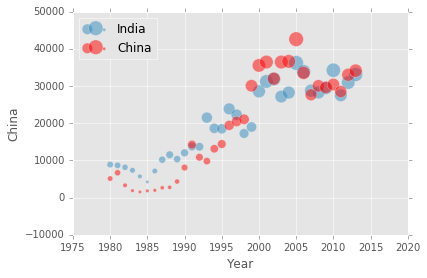

In [189]:
ax = df_china_india.plot.scatter(x= 'Year', y = 'India', alpha=0.5, s=india_norm*200+10)
df_china_india.plot.scatter(x= 'Year', y = 'China',ax=ax, color = 'red', alpha=0.5,s=china_norm*200+10)
plt.ticklabel_format(useOffset=False)
plt.legend(['India', 'China'], loc = 'upper left')

### Multiple legend
* If we try to do `plt.legend()` or `ax.legend()` multiple times matplotlib will overwrite previous legend.
* So, to create multiple legends we will use work around. Using `add_artist()`.

C:\Users\davep\Anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x000002A2A2FB13C8>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\davep\Anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x000002A2A2FCCF60>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\Users\davep\Anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x000002A2A2FC8BA8>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legen

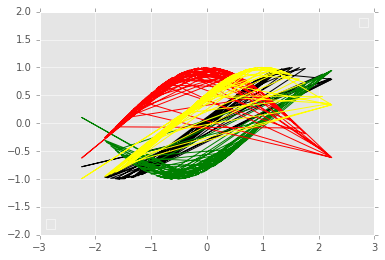

In [190]:
fig,ax = plt.subplots()

lines = []
lines.append(ax.plot(x, np.sin(x), color = 'black'))
lines.append(ax.plot(x, np.sin(x - 1), color = 'green'))
lines.append(ax.plot(x, np.cos(x), color = 'red'))
lines.append(ax.plot(x, np.cos(x - 1), color = 'yellow'))
ax.axis('equal')
ax.legend(lines[:2], ['lineA', 'lineB'], loc = 'upper right')

from matplotlib.legend import Legend

leg = Legend(ax, lines[2:], ['lineC', 'lineD'], loc = 'lower left')
ax.add_artist(leg)

### Colorbar
* `cmap` argument is used to specify colormap.
* Sequential colormap : One continuous sequence of colors (binary, viridis)
* Divergent colormap : Contains 2 distinct colors, which shows +ve and -ve deviations from mean. (RdBu, PuOr)
* Quantitative colormap: These mix colors with particular sequence (rainbow, jet)

------------

# Errorbars

In [191]:
x = np.linspace(0,10,50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

<ErrorbarContainer object of 3 artists>

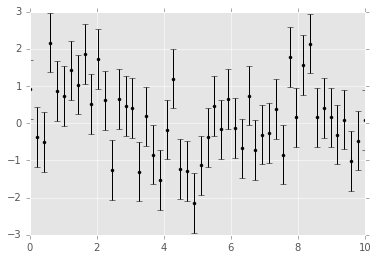

In [192]:
plt.errorbar(x,y,yerr=dy, fmt='.k')

<ErrorbarContainer object of 3 artists>

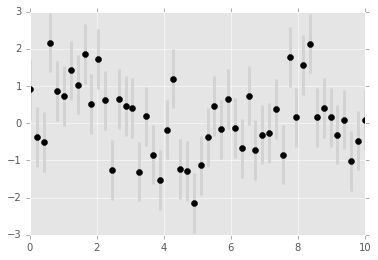

In [193]:
plt.errorbar(x,y, yerr = dy, fmt = 'o', color = 'black',
             ecolor='lightgray', elinewidth=3, capsize=0)

* Even we can specigy horizontal error bar using `xerr`.

```
# set bin edges, compute centers
bin_size = 0.25
xbin_edges = np.arange(0.5, df['num_var1'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

# compute statistics in each bin
data_xbins = pd.cut(df['num_var1'], xbin_edges, right = False, include_lowest = True)
y_means = df['num_var2'].groupby(data_xbins).mean()
y_sems = df['num_var2'].groupby(data_xbins).sem()

# plot the summarized data
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems)
plt.xlabel('num_var1')
plt.ylabel('num_var2')
```

* Since the x-variable ('num_var1') is continuous, we first set a number of bins into which the data will be grouped. In addition to the usual edges, the center of each bin is also computed for later plotting. For the points in each bin, we compute the mean and standard error of the mean. 

* ALternative is using window function

```
# compute statistics in a rolling window
df_window = df.sort_values('num_var1').rolling(15)
x_winmean = df_window.mean()['num_var1']
y_median = df_window.median()['num_var2']
y_q1 = df_window.quantile(.25)['num_var2']
y_q3 = df_window.quantile(.75)['num_var2']

# plot the summarized data
base_color = sb.color_palette()[0]
line_color = sb.color_palette('dark')[0]
plt.scatter(data = df, x = 'num_var1', y = 'num_var2')
plt.errorbar(x = x_winmean, y = y_median, c = line_color)
plt.errorbar(x = x_winmean, y = y_q1, c = line_color, linestyle = '--')
plt.errorbar(x = x_winmean, y = y_q3, c = line_color, linestyle = '--')

plt.xlabel('num_var1')
plt.ylabel('num_var2')
```

-----------

# Density and Contour Plot

#### `plt.contour` `plt.contourf`

In [194]:
def f(x,y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

* `plt.contour` take 3 arguments grid of x and y and z values. x and y represent position on plane. z represented by contour levels

* Using `np.mashgrid()` we can generated 2D grid with 1-D arrays

In [195]:
x = np.linspace(0,5,50)
y = np.linspace(0,5,40)



X,Y = np.meshgrid(x,y)

In [196]:
Z = f(X,Y)

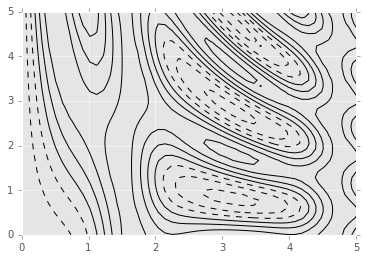

In [197]:
plt.contour(X,Y,Z, colors='black') # ticks are used from X and Y

* -ve values are represented as dashed, positive as solid.

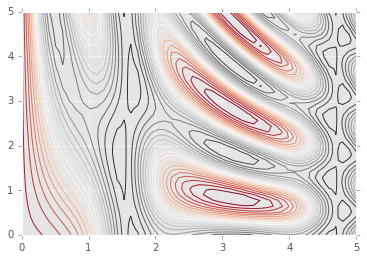

In [198]:
plt.contour(X,Y,Z,20,cmap = 'RdGy') # cmap specify colormap

* 20 tells draw 20 equally spaced line within dataset.
* RdGy says Red-Gray colormap.

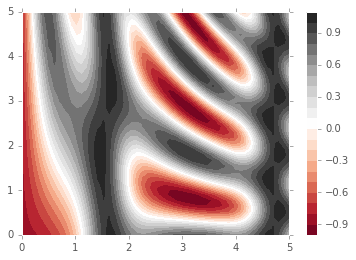

In [199]:
plt.contourf(X,Y,Z,20,cmap='RdGy')
plt.colorbar()

* Black regions are peaks and red regions are valleys.

-------

# Histogram
* Way of representing the frequency distribution of a numerical variable.

In [200]:
data = np.random.randn(1000)

(array([  2.,  13.,  35., 106., 181., 244., 217., 136.,  46.,  20.]),
 array([-3.49703669, -2.87903888, -2.26104108, -1.64304328, -1.02504548,
        -0.40704768,  0.21095012,  0.82894792,  1.44694572,  2.06494352,
         2.68294132]),
 <a list of 10 Patch objects>)

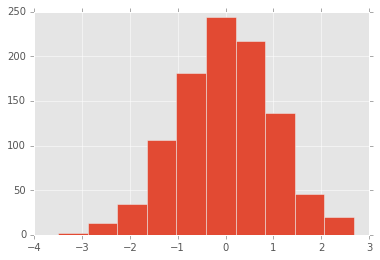

In [201]:
plt.hist(data)

* By default there are 10 bins and range will be min and max value of given data. we can supply own range by `range = (0,5)`

* `normed = True` shows PDF.

C:\Users\davep\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.00485439, 0.        , 0.00485439, 0.        , 0.01941754,
        0.04368948, 0.04368948, 0.06796141, 0.05825263, 0.11165088,
        0.20388422, 0.19902983, 0.34466142, 0.23786492, 0.29611756,
        0.33009826, 0.43204037, 0.4223316 , 0.41747721, 0.40291406,
        0.23301054, 0.26213686, 0.21844738, 0.17961229, 0.07281579,
        0.10194211, 0.04854386, 0.02912632, 0.02912632, 0.03883509]),
 array([-3.49703669, -3.29103742, -3.08503815, -2.87903888, -2.67303962,
        -2.46704035, -2.26104108, -2.05504182, -1.84904255, -1.64304328,
        -1.43704402, -1.23104475, -1.02504548, -0.81904621, -0.61304695,
        -0.40704768, -0.20104841,  0.00495085,  0.21095012,  0.41694939,
         0.62294865,  0.82894792,  1.03494719,  1.24094646,  1.44694572,
         1.65294499,  1.85894426,  2.06494352,  2.27094279,  2.47694206,
         2.68294132]),
 <a list of 1 Patch objects>)

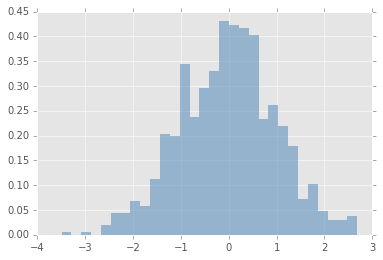

In [202]:
plt.hist(data, bins = 30, normed=True, alpha = 0.5, histtype='stepfilled', color='steelblue', edgecolor = 'none')

C:\Users\davep\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.001, 0.001, 0.002, 0.002, 0.006, 0.015, 0.024, 0.038, 0.05 ,
        0.073, 0.115, 0.156, 0.227, 0.276, 0.337, 0.405, 0.494, 0.581,
        0.667, 0.75 , 0.798, 0.852, 0.897, 0.934, 0.949, 0.97 , 0.98 ,
        0.986, 0.992, 1.   ]),
 array([-3.49703669, -3.29103742, -3.08503815, -2.87903888, -2.67303962,
        -2.46704035, -2.26104108, -2.05504182, -1.84904255, -1.64304328,
        -1.43704402, -1.23104475, -1.02504548, -0.81904621, -0.61304695,
        -0.40704768, -0.20104841,  0.00495085,  0.21095012,  0.41694939,
         0.62294865,  0.82894792,  1.03494719,  1.24094646,  1.44694572,
         1.65294499,  1.85894426,  2.06494352,  2.27094279,  2.47694206,
         2.68294132]),
 <a list of 1 Patch objects>)

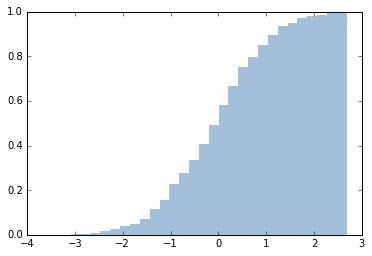

In [266]:
plt.hist(data, bins = 30, normed=True, cumulative=True, alpha = 0.5, histtype='stepfilled', color='steelblue', edgecolor = 'none')

* `normed=True` and `cumulative=True` shows CDF

(array([0.00485439, 0.        , 0.00485439, 0.        , 0.01941754,
        0.04368948, 0.04368948, 0.06796141, 0.05825263, 0.11165088,
        0.20388422, 0.19902983, 0.34466142, 0.23786492, 0.29611756,
        0.33009826, 0.43204037, 0.4223316 , 0.41747721, 0.40291406,
        0.23301054, 0.26213686, 0.21844738, 0.17961229, 0.07281579,
        0.10194211, 0.04854386, 0.02912632, 0.02912632, 0.03883509]),
 array([-3.49703669, -3.29103742, -3.08503815, -2.87903888, -2.67303962,
        -2.46704035, -2.26104108, -2.05504182, -1.84904255, -1.64304328,
        -1.43704402, -1.23104475, -1.02504548, -0.81904621, -0.61304695,
        -0.40704768, -0.20104841,  0.00495085,  0.21095012,  0.41694939,
         0.62294865,  0.82894792,  1.03494719,  1.24094646,  1.44694572,
         1.65294499,  1.85894426,  2.06494352,  2.27094279,  2.47694206,
         2.68294132]),
 <a list of 1 Patch objects>)

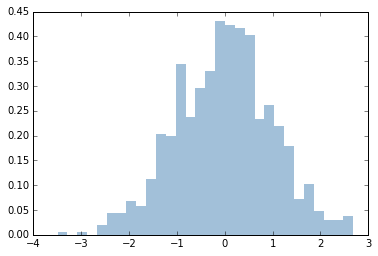

In [268]:
plt.hist(data, bins = 30, density=True, alpha = 0.5, histtype='stepfilled', color='steelblue', edgecolor = 'none')

* `density = True` also normalize data

* `histtype='stepfilled'` is useful along with alpha to compare histogram of several distributions

* number of beens = $\sqrt{len(data)}$
* We lost data in binning alternate is beaswarm plot
* Large bins will create discontinued histogram.
* Too many bins will create noise and not allow us with identification of underlying shape. Too few buns will not allow to see true shape.

In [203]:
x1 = np.random.normal(0,0.8, 1000)
x2 = np.random.normal(-2,1,1000)
x3 = np.random.normal(3,2,1000)

In [204]:
kwargs = dict(histtype = 'stepfilled', alpha = 0.3, normed = True, bins = 40)

(array([0.01314257, 0.00985693, 0.00985693, 0.02628514, 0.02628514,
        0.045999  , 0.04928464, 0.03942771, 0.10514057, 0.1149975 ,
        0.14128264, 0.11171185, 0.14128264, 0.17413907, 0.18071035,
        0.21685242, 0.18399599, 0.22670935, 0.20699549, 0.11828314,
        0.17413907, 0.1609965 , 0.1609965 , 0.12814007, 0.11171185,
        0.06571286, 0.07556978, 0.05257028, 0.04928464, 0.03614207,
        0.0229995 , 0.0229995 , 0.01642821, 0.01642821, 0.00328564,
        0.0229995 , 0.01971386, 0.        , 0.        , 0.00328564]),
 array([-2.37540868, -2.07105423, -1.76669978, -1.46234533, -1.15799088,
        -0.85363643, -0.54928197, -0.24492752,  0.05942693,  0.36378138,
         0.66813583,  0.97249028,  1.27684473,  1.58119918,  1.88555363,
         2.18990809,  2.49426254,  2.79861699,  3.10297144,  3.40732589,
         3.71168034,  4.01603479,  4.32038924,  4.62474369,  4.92909815,
         5.2334526 ,  5.53780705,  5.8421615 ,  6.14651595,  6.4508704 ,
         6.75522

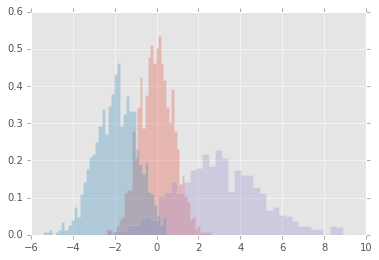

In [205]:
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

* To only compute histogram, number of points in a given bin, use `np.histogram`

In [206]:
counts, bin_edges = np.histogram(data, bins = 5)

In [207]:
counts

array([ 15, 141, 425, 353,  66], dtype=int64)

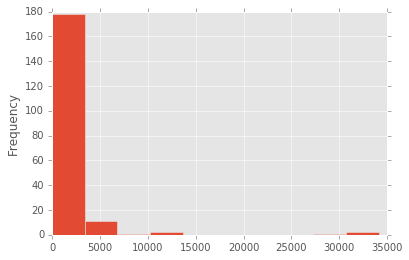

In [208]:
immigrants['2013'].plot('hist')

* Here ticks are in between. Let's fix it

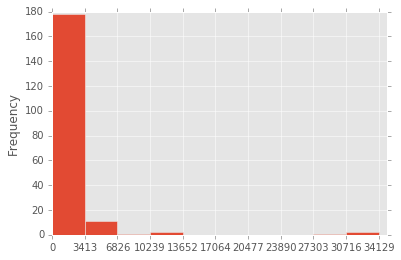

In [209]:
count, bin_edge = np.histogram(immigrants['2013'])
immigrants['2013'].plot(kind='hist', xticks=bin_edge)

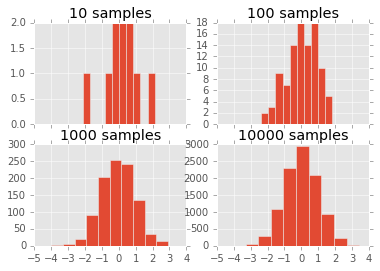

In [210]:
fig, ax = plt.subplots(2,2, sharex=True)
ax = ax.flatten()
for i in range(len(ax)):
    sample_size = (10 ** (i+1))
    sample = np.random.normal(loc=0.0, scale = 1.0, size=sample_size)
    ax[i].hist(sample)
    ax[i].set_title('{} samples'.format(sample_size))

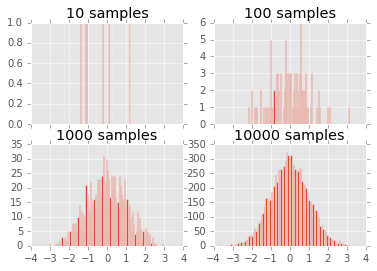

In [211]:
fig, ax = plt.subplots(2,2, sharex=True)
ax = ax.flatten()
for i in range(len(ax)):
    sample_size = (10 ** (i+1))
    sample = np.random.normal(loc=0.0, scale = 1.0, size=sample_size)
    ax[i].hist(sample, bins=100)
    ax[i].set_title('{} samples'.format(sample_size))

* Matplotlib's hist function can also be adapted so that bar heights indicate value other than a count of points through the use of the "weights" parameter. By default, each data point is given a weight of 1, so that the sum of point weights in each bin is equal to the number of points. If we change the weights to be a representative function of each point's value on a second variable, then the sum will end up representing something other than a count.

```
bin_edges = np.arange(0, df['num_var'].max()+1/3, 1/3)

# count number of points in each bin
bin_idxs = pd.cut(df['num_var'], bin_edges, right = False, include_lowest = True,
                  labels = False).astype(int)
pts_per_bin = df.groupby(bin_idxs).size()

num_var_wts = df['binary_out'] / pts_per_bin[bin_idxs].values

# plot the data using the calculated weights
plt.hist(data = df, x = 'num_var', bins = bin_edges, weights = num_var_wts)
plt.xlabel('num_var')
plt.ylabel('mean(binary_out)')
```

* To get the mean of the y-variable ("binary_out") in each bin, the weight of each point should be equal to the y-variable value, divided by the number of points in its x-bin (num_var_wts). As part of this computation, we make use of pandas' cut function in order to associate each data point to a particular bin (bin_idxs). The labels = False parameter means that each point's bin membership is associated by a numeric index, rather than a string. We use these numeric indices into the pts_per_bin, with the .values at the end necessary in order for the Series' indices to not be confused between the indices of df['binary_out'].

(array([  2.,   0.,   2.,   3.,   1.,   1.,   1.,   6.,   8.,   7.,   1.,
          5.,   5.,   9.,  11.,  12.,  16.,  21.,  27.,  32.,  36.,  54.,
         58.,  52.,  78.,  75.,  92., 124., 105., 146., 131., 175., 190.,
        208., 194., 207., 234., 244., 274., 294., 304., 310., 316., 295.,
        315., 298., 314., 309., 366., 344., 340., 285., 285., 245., 265.,
        260., 242., 202., 183., 183., 143., 121., 133., 113., 108.,  89.,
         88.,  62.,  57.,  45.,  37.,  40.,  24.,  29.,  22.,   9.,  15.,
         13.,  10.,  12.,   6.,   5.,   2.,   4.,   0.,   3.,   3.,   1.,
          0.,   0.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-3.7635875 , -3.68159289, -3.59959828, -3.51760367, -3.43560906,
        -3.35361445, -3.27161984, -3.18962523, -3.10763062, -3.02563601,
        -2.9436414 , -2.86164679, -2.77965218, -2.69765757, -2.61566296,
        -2.53366835, -2.45167374, -2.36967913, -2.28768452, -2.20568991,
        -2.1236953 , -2.04

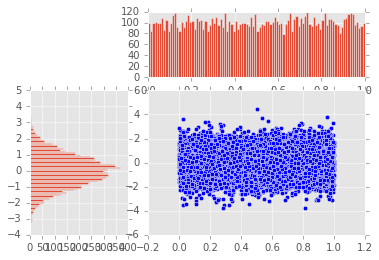

In [212]:
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3,3)
top_hist = plt.subplot(gspec[0, 1:])
side_hist = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

Y = np.random.normal(loc=0.0, scale=1.0, size = 10000)
X = np.random.random(size=10000)
lower_right.scatter(X,Y)
top_hist.hist(X, bins=100)
side_hist.hist(Y, bins=100, orientation='horizontal')

-------

# 2D histogram and binning
* We can create 2D histogram by dividing points among 2D bins.

In [213]:
mean = [0,0]
cov = [[1,1], [1,2]]

In [214]:
x,y = np.random.multivariate_normal(mean, cov, 10000).T

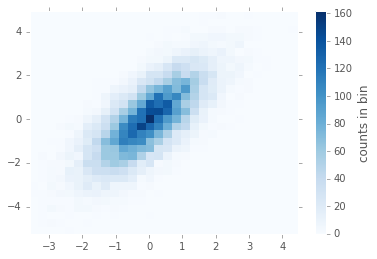

In [215]:
plt.hist2d(x,y, bins = 30, cmap = 'Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [216]:
counts, xedges, yedges = np.histogram2d(x,y, bins = 30)

* We can also pass  `bins = [bins_x, bins_y]`
* I would like to distinguish cells with zero counts from those with non-zero counts. The "cmin" parameter specifies the minimum value in a cell before it will be plotted. By adding a cmin = 0.5 parameter to the hist2d call, this means that a cell will only get colored if it contains at least one point.

* `np.histogramdd` function is useful for binning in higher than 2 D.

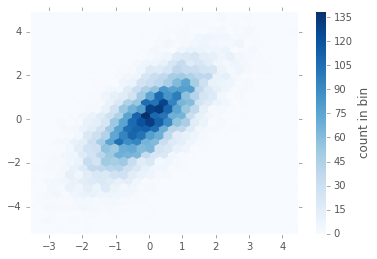

In [217]:
plt.hexbin(x, y , gridsize=30, cmap = 'Blues')
cb = plt.colorbar(label = 'count in bin')

* To write into each box

```
counts = h2d[0]

# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 7: # increase visibility on darkest cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')
```

Text(0, 0.5, 'CO2 (g/mi)')

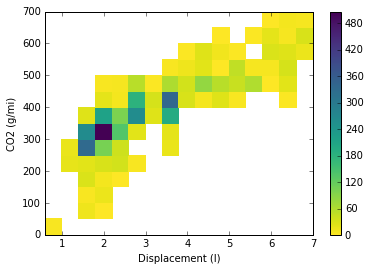

In [332]:
fuel_econ = pd.read_csv('../fuel_econ.csv')

bins_x = np.arange(0.6, fuel_econ['displ'].max()+0.4, 0.4)
bins_y = np.arange(0, fuel_econ['co2'].max()+50, 50)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'co2', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('CO2 (g/mi)')

-------

# Bar chart
* In bar chart we have to specify,
![](images/matplotlib_barplot_positioning.png)

* `plt.bar()` or `axes.bar()` has 2 required parameter `x` and `height`.
* `x` specify x coordinate of middle of bar (blue colored in above figure). `height` specify height of each bar.

Text(0.5, 1.0, 'my title')

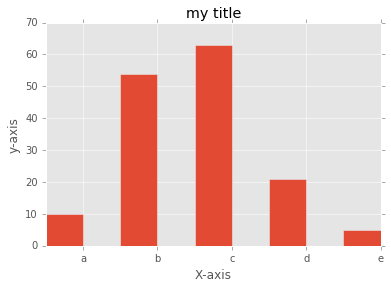

In [218]:
fig,ax = plt.subplots()
bar_position = np.arange(5) + 0.75 # bar middle point position
bar_height = [10, 54, 63, 21, 5]

ax.bar(x = bar_position, height = bar_height, width = 0.5)
ax.set_xticks(np.arange(1,6)) # specify tick poisition
ax.set_xticklabels(['a', 'b', 'c', 'd', 'e'], rotation=0)
ax.set_xlabel("X-axis")
ax.set_ylabel("y-axis")
ax.set_title("my title")

* Using `axes.barh()` we can create horizontal bar chart.

[Text(0, 0, 'a'),
 Text(0, 0, 'b'),
 Text(0, 0, 'c'),
 Text(0, 0, 'd'),
 Text(0, 0, 'e')]

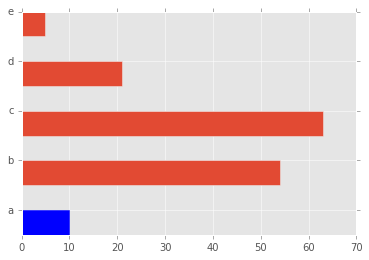

In [219]:
fig,ax = plt.subplots()
bars = ax.barh(y=bar_position, width = bar_height, height = 0.5)
bars[0].set_color('blue')
ax.set_yticks(range(1,6))
ax.set_yticklabels(['a', 'b', 'c', 'd', 'e'])
# plt.yticks([0,2,4,6,8,10], ['0', '2B', '4B', '6B', '8B', '10B']) # Start y-axis from 0, and give label to each tick


* Let's visualize from immigration data

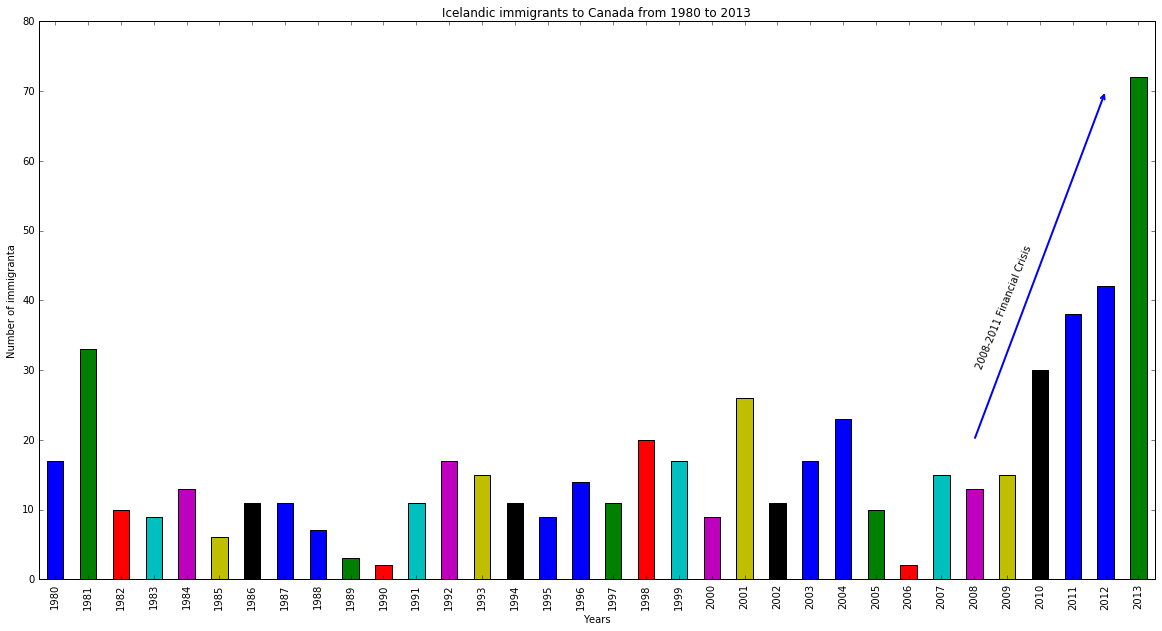

In [275]:
immigrants.loc['Iceland', years].plot(kind='bar', figsize=(20,10))
plt.xlabel('Years')
plt.ylabel('Number of immigranta')
plt.title('Icelandic immigrants to Canada from 1980 to 2013')
plt.annotate(s = '',xy= (32,70), xytext= (28,20), xycoords='data',
             arrowprops=dict(arrowstyle='->', color='blue', lw=2))

plt.annotate(s='2008-2011 Financial Crisis', xy=(28,30), rotation=68, va='bottom', ha='left')
locs, labels = plt.xticks()

In [276]:
locs

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [277]:
labels

<a list of 34 Text xticklabel objects>

- `rotation`: rotation angle of text in degrees (counter clockwise)
- `va`: vertical alignment of text [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
- `ha`: horizontal alignment of text [‘center’ | ‘right’ | ‘left’]

#### Horizontal bar of top 15 contiries of immigrant

In [221]:
top_15 = immigrants['Total'].sort_values(ascending=False)[:15]
top_15.rename(index = {'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'},
              inplace=True)

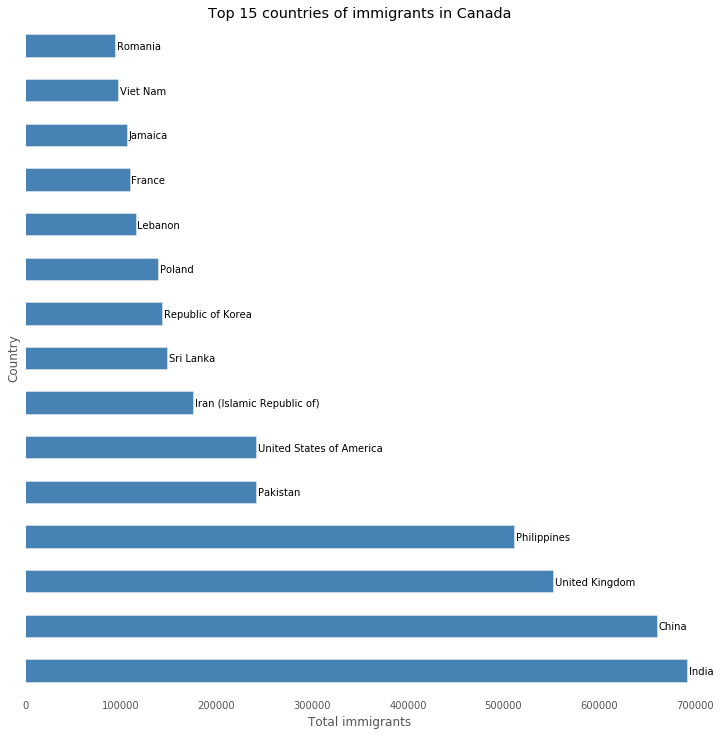

In [222]:
ax = top_15.plot.barh(figsize=(12,12), color='steelblue')
plt.ylabel('Country')
plt.xlabel('Total immigrants')
plt.title('Top 15 countries of immigrants in Canada')
plt.tick_params(bottom=False, top=False, left=False, right=False)
plt.grid(False)
ax.set_facecolor('white')
plt.tick_params(axis='y', labelleft=False)
for idx, name in enumerate(top_15.index):
    plt.annotate(s = name, xy=(top_15[idx] + 2000, idx-0.10))


----------------------------

# Box plots
* Useful to show aggregae statistics. Shows median, min, max, IQR

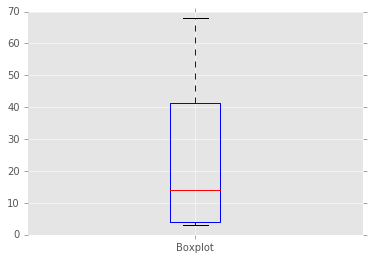

In [223]:
fig, ax = plt.subplots()
ax.boxplot([4,68,3,4,24,47])
# If we pass multidimensional sequence here we can get multiple box plots
ax.set_xticklabels(["Boxplot"])
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2a2a61a8e48>,
 'caps': [<matplotlib.lines.Line2D at 0x2a2a61b2550>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a2a61a8a90>,
 'medians': [<matplotlib.lines.Line2D at 0x2a2a61b2be0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2a2a61b2f28>,
 'means': []}

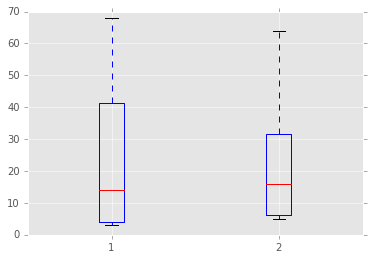

In [224]:
fig, ax = plt.subplots()
ax.boxplot([[4,68,3,4,24,47], [5,64,7,6,34,25]])

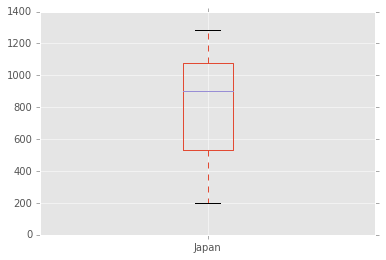

In [225]:
immigrants.loc['Japan', years].T.plot(kind='box')

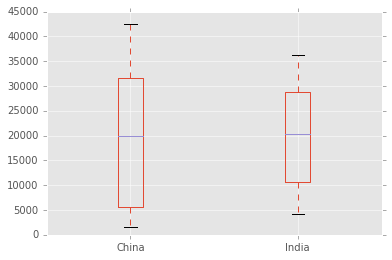

In [226]:
immigrants.loc[['China', 'India'], years].T.plot.box()

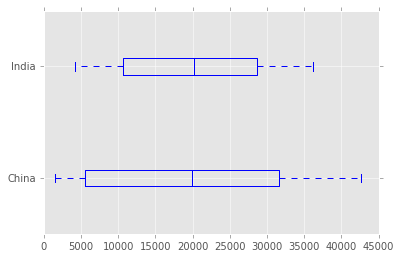

In [227]:
immigrants.loc[['China', 'India'], years].T.plot.box(vert=False, color='blue')

* Subplots in Pandas style plotting

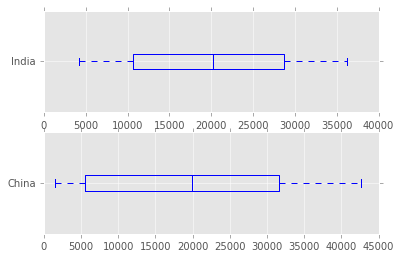

In [228]:
fig, ax = plt.subplots(2,1)

immigrants.loc['India', years].T.plot.box(vert=False, color='blue', ax = ax[0])
immigrants.loc['China', years].T.plot.box(vert=False, color='blue', ax = ax[1])

In [229]:
normal_sample = np.random.normal(loc=0, scale=1, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 'random': random_sample, 'gamma': gamma_sample})
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,-0.016226,0.501358,2.007875
std,1.000610,0.287207,1.425933
min,-3.811998,0.000140,0.018833
25%,-0.679176,0.253607,0.944712
50%,-0.023416,0.500406,1.675922
75%,0.663168,0.748641,2.717476
max,3.606104,0.999982,11.497165


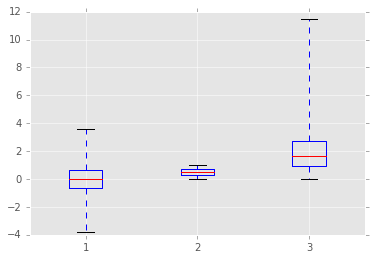

In [230]:
_ = plt.boxplot([df['normal'], df['random'], df['gamma']], whis='range')
# Set whistker value to all the way min or max

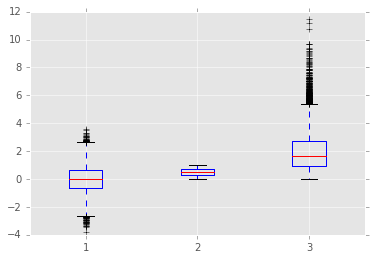

In [231]:
_ = plt.boxplot([df['normal'], df['random'], df['gamma']])

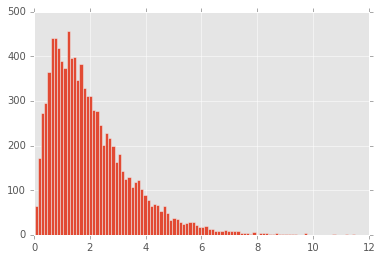

In [232]:
df['gamma'].hist(bins=100)

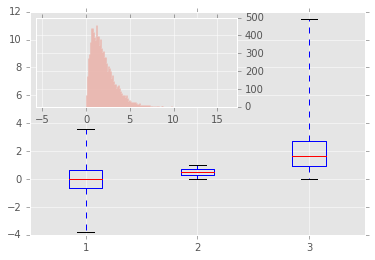

In [233]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
plt.boxplot([df['normal'], df['random'], df['gamma']], whis='range')
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)
ax2.yaxis.tick_right()

--------------

# Pie Chart
* Visualize data by continent from immigration dataset

In [234]:
continent_data = immigrants.groupby('Continent', axis=0).sum()

In [235]:
continent_data

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


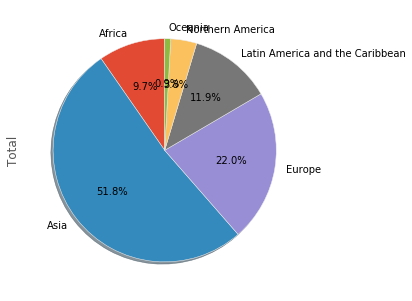

In [236]:
continent_data['Total'].plot.pie(autopct='%1.1f%%', startangle = 90, shadow=True, figsize=(5,6))

- `autopct` -  is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.
- `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
- `shadow` - Draws a shadow beneath the pie (to give a 3D feel).

### Donut plot

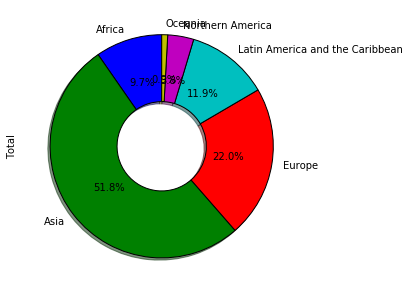

In [273]:
continent_data['Total'].plot.pie(autopct='%1.1f%%', startangle = 90, shadow=True, figsize=(5,6), wedgeprops={'width':0.6})

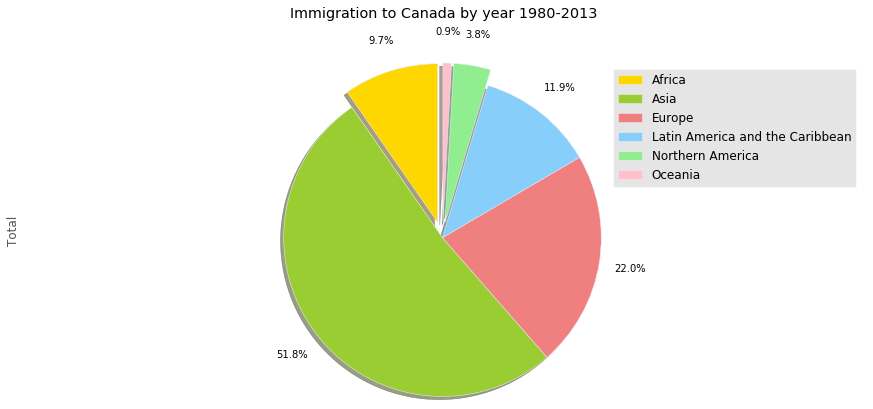

In [237]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
# ratio for each continent with which to offset each wedge.
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] 
continent_data['Total'].plot.pie(startangle=90, figsize=(15,6), shadow=True, labels=None,
                                autopct='%1.1f%%',pctdistance=1.2, colors = colors_list,
                                explode = explode_list)
plt.title("Immigration to Canada by year 1980-2013", y = 1.12)
plt.axis('equal')
plt.legend(labels=continent_data.index, loc = 'best')

* `explode` : explode specific wedge
* `label`  turn off labels on pie chart
* `pctdistance` the ratio between the center of each pie slice and the start of the text generated by autopct 

------------
# Waffle Charts
* Also known as the square pie chart. While the standard pie chart uses a circle to represent the whole, a waffle plot is plotted onto a square divided into a 10x10 grid. Each small square in the grid represents one percent of the data, and a number of squares are colored by category to indicate total proportions.
![](waffle_plot.PNG)

In [328]:
from pywaffle import Waffle

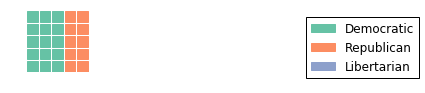

In [331]:
data = {'Democratic': 48, 'Republican': 46, 'Libertarian': 3}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)

---------------
# Word Cloud
* Depiction of the frequency of different words in some textual data.

# Animation

In [238]:
%matplotlib notebook

In [239]:
import matplotlib.animation as animation
# Visualize histogram from 1 sample to 100 sample
n = 100
x = np.random.randn(n)

In [240]:
# Matplotlib will call this function every ms and pass frame number which we are on right 
# now from 0.
def update(curr):
    if curr == n:
        a.event_source.stop()
    plt.cla() # Clear current axis
    bins = np.arange(-4,4,0.5)
    plt.hist(x[:curr], bins = bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the normal distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

<IPython.core.display.Javascript object>


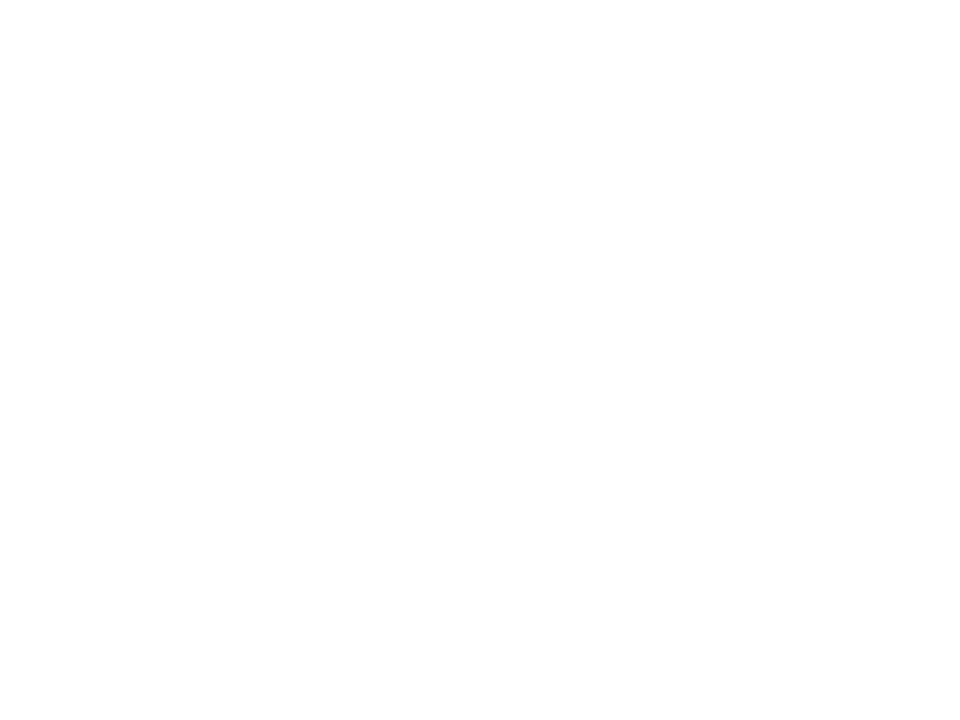

<IPython.core.display.Javascript object>


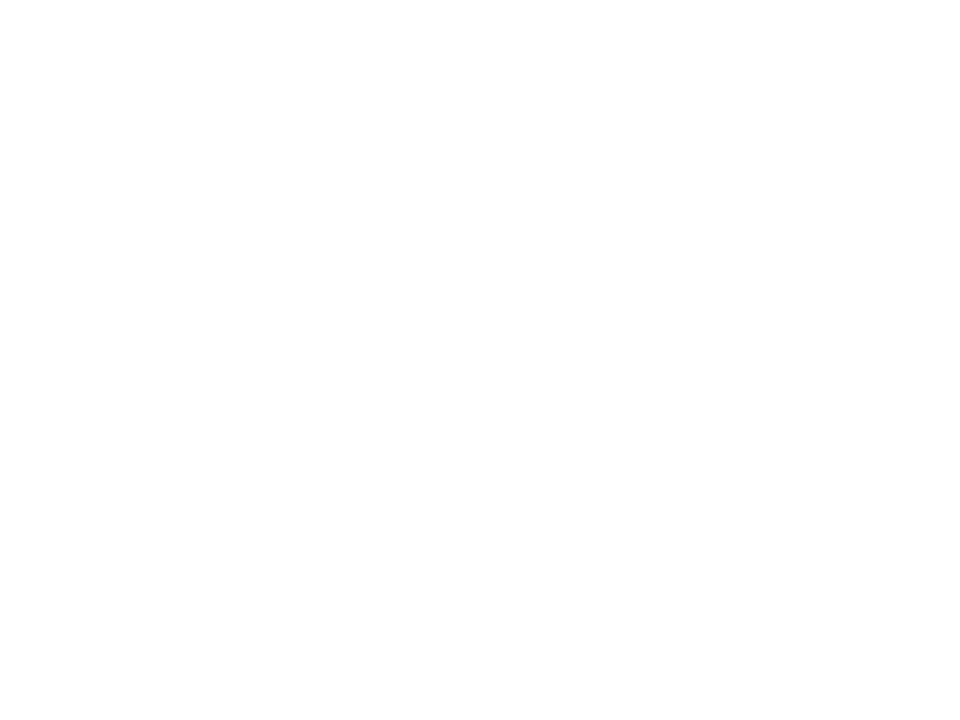

Traceback (most recent call last):
  File "C:\Users\davep\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "C:\Users\davep\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [241]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update,interval=100)

# Interactivity


### 3-D plotting

In [242]:
from mpl_toolkits import mplot3d

*  Just pass `projection='3d'`to get 3D graph

<IPython.core.display.Javascript object>


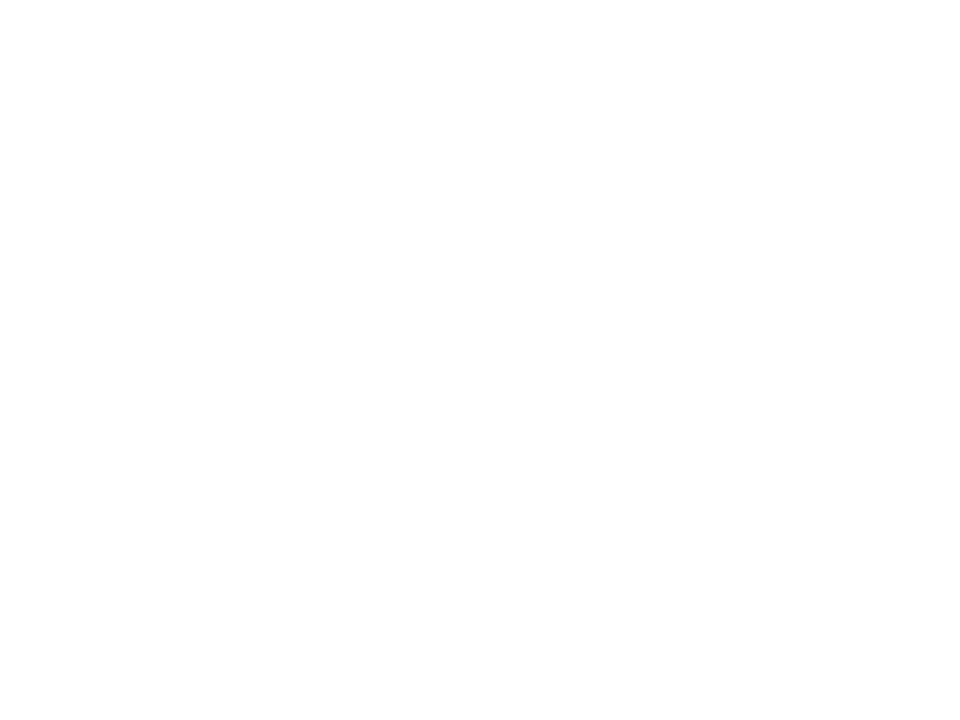

<IPython.core.display.Javascript object>


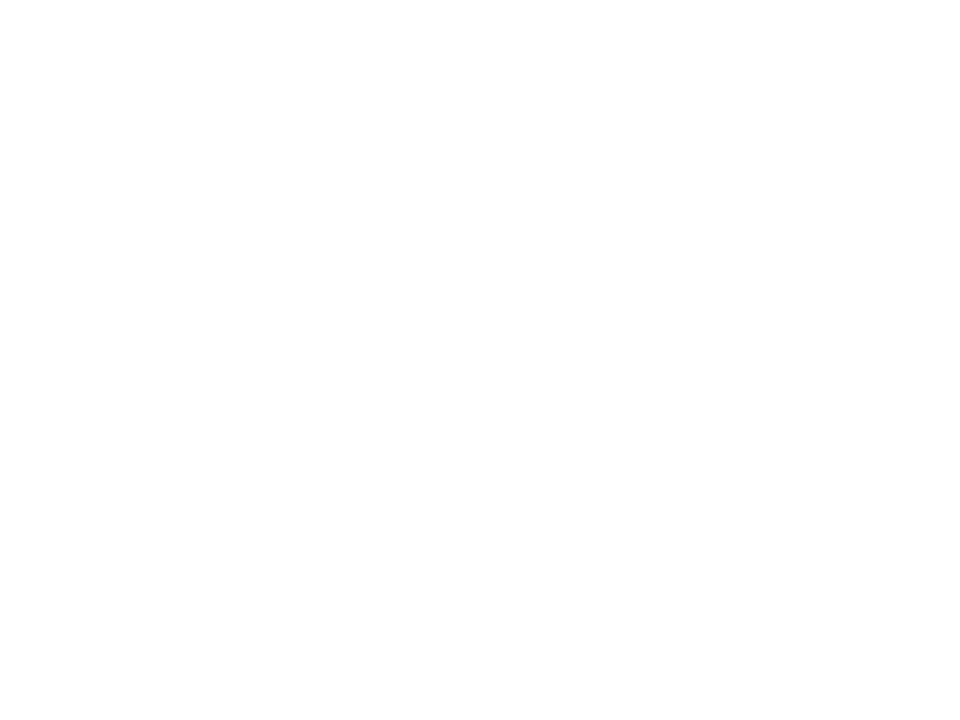

In [243]:
fig = plt.figure()
ax = plt.axes(projection='3d')

<IPython.core.display.Javascript object>


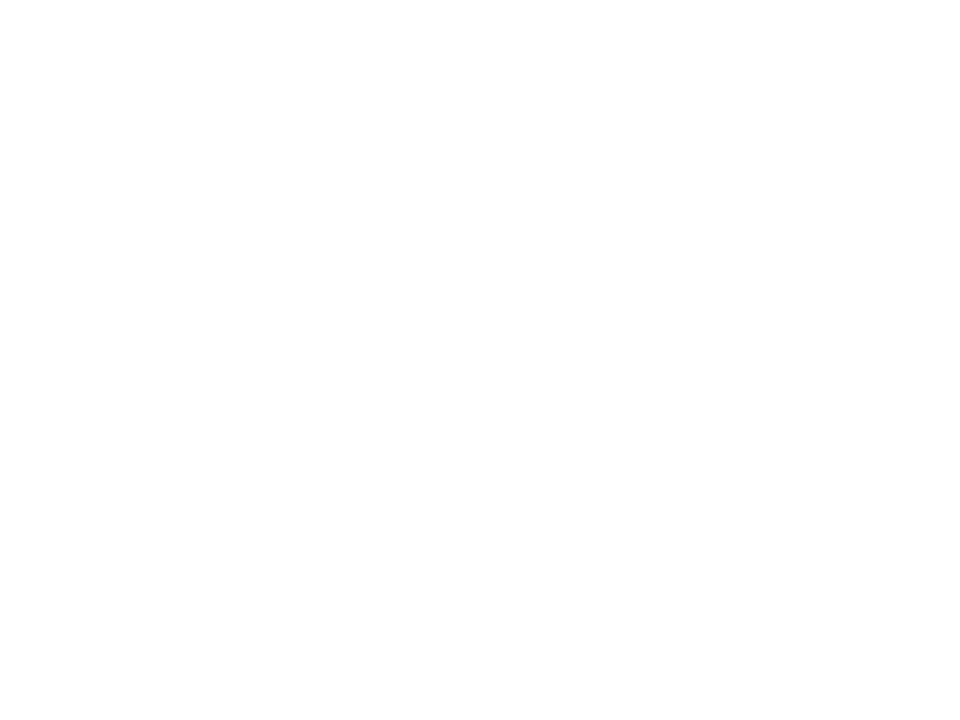

<IPython.core.display.Javascript object>


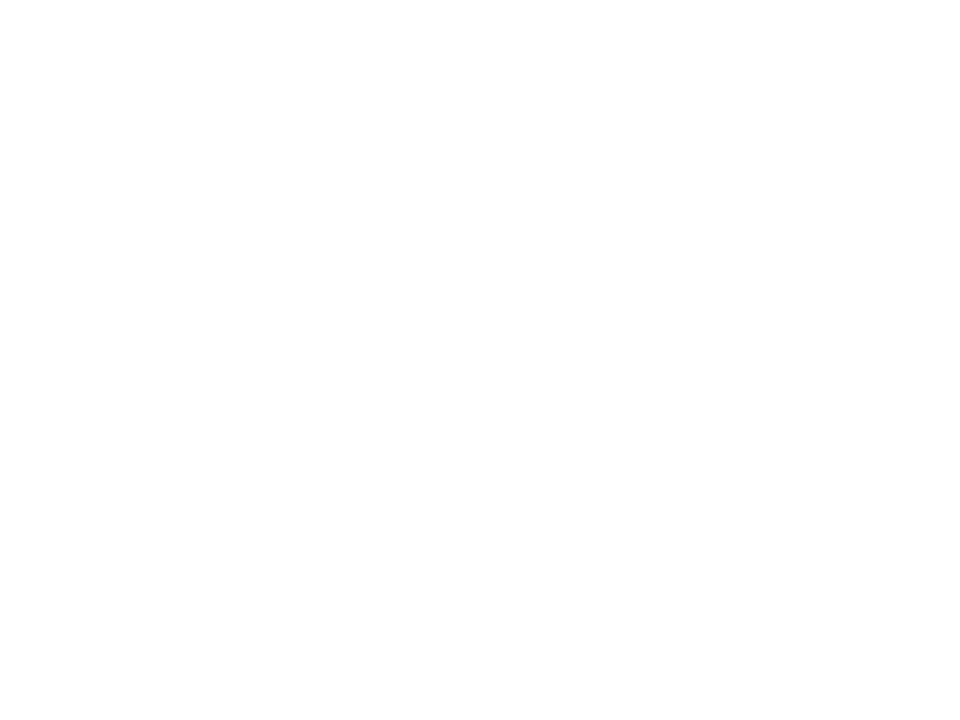

In [244]:
zline = np.linspace(0,15,1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax = plt.axes(projection='3d')
ax.plot3D(xline, yline, zline, 'gray')


zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.random(100)
ydata = np.cos(zdata) + 0.1 * np.random.random(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

<IPython.core.display.Javascript object>


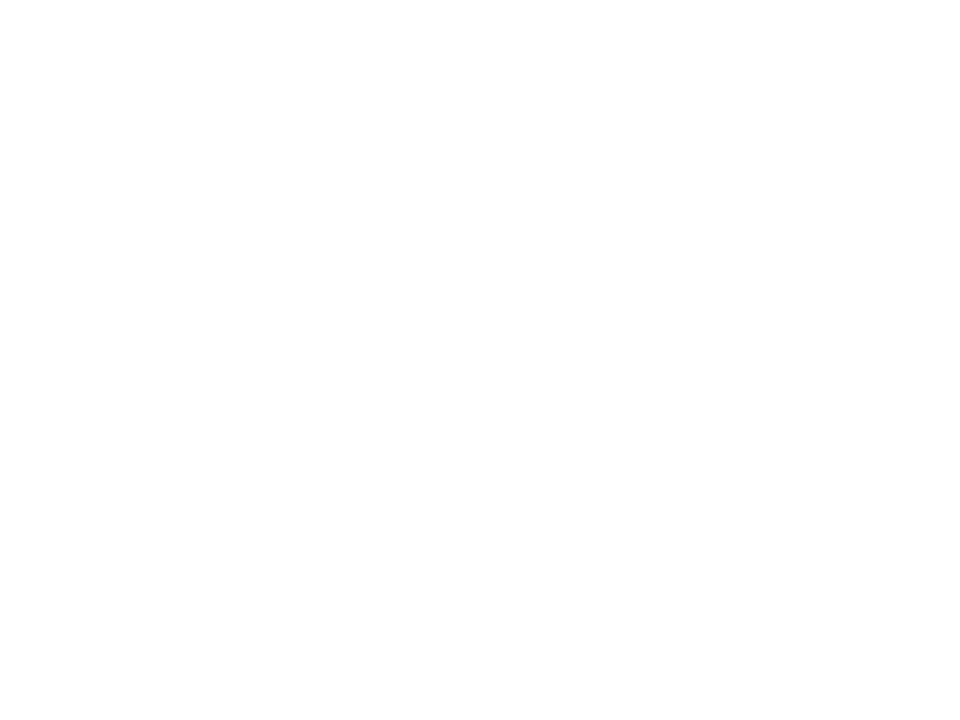

<IPython.core.display.Javascript object>


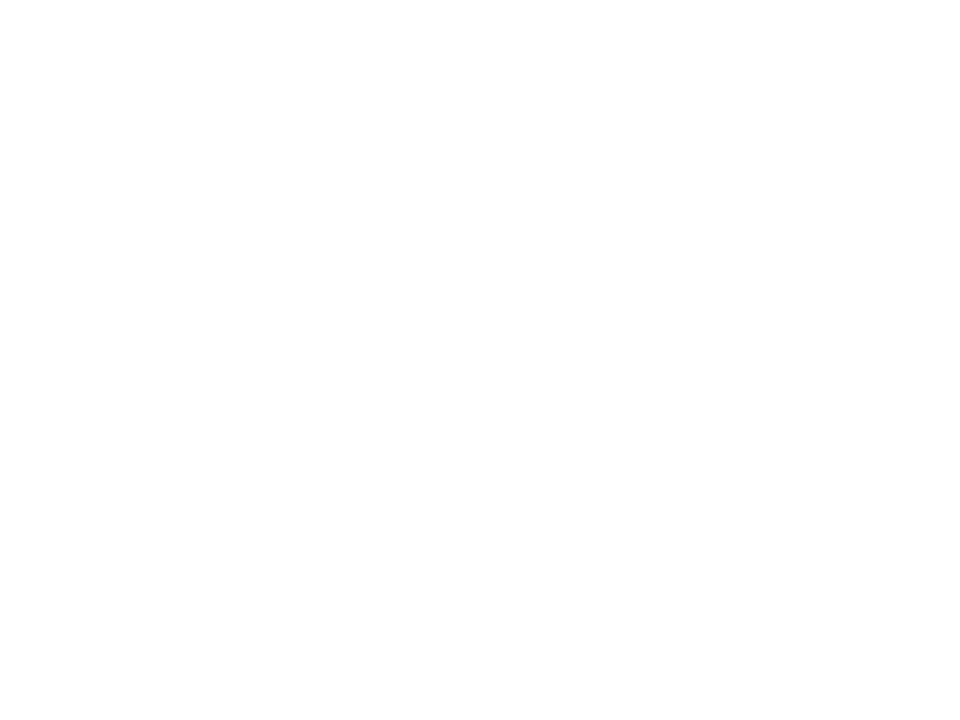

In [245]:
def f(x,y):
    return np.sin(np.sqrt(x**2 + y**2))

x = np.linspace(-6,6,30)
y = np.linspace(-6,6,30)

X,Y = np.meshgrid(x,y)

Z = f(X,Y)

ax = plt.axes(projection='3d')
ax.contour3D(X,Y,Z, 50, cmap='binary')
ax.view_init(60,35) # Change view
# elevation of 60 degrees above x-y plane and an azimuth of 35 degrees. 
#(rotated 35 degrees coiunter clock wise from z-axis)

<IPython.core.display.Javascript object>


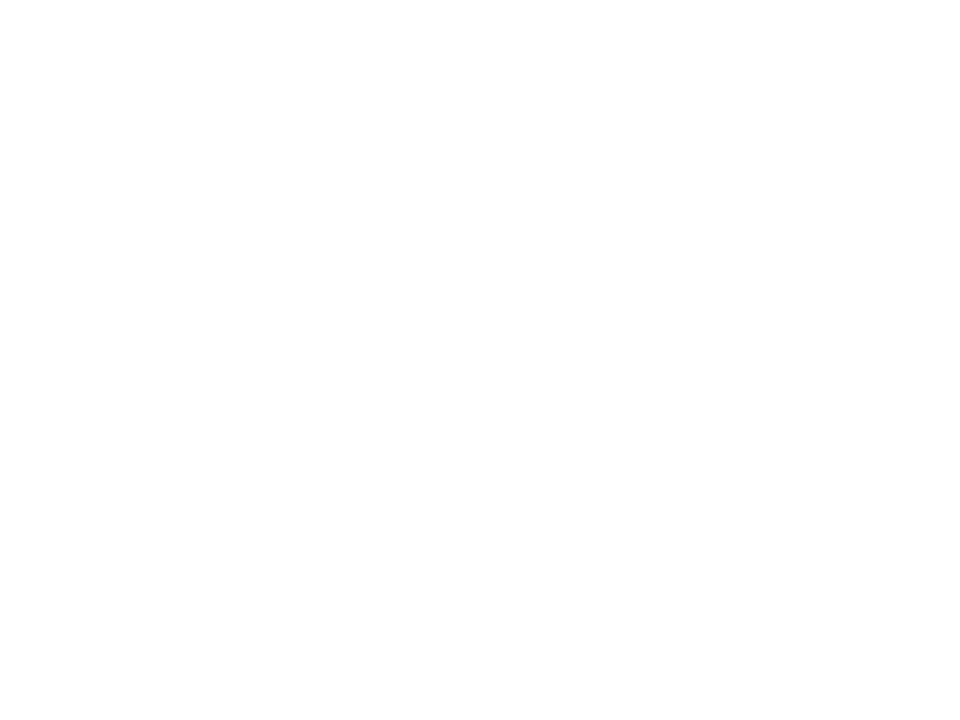

<IPython.core.display.Javascript object>


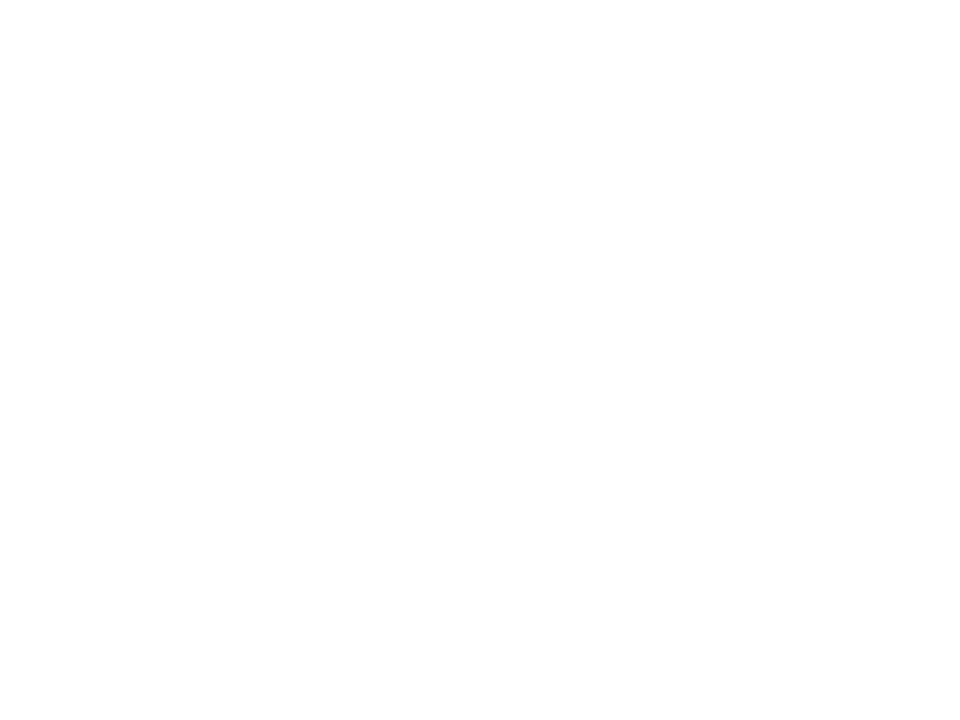

In [246]:
ax = plt.axes(projection='3d')
ax.plot_wireframe(X,Y,Z, color = 'black')

<IPython.core.display.Javascript object>


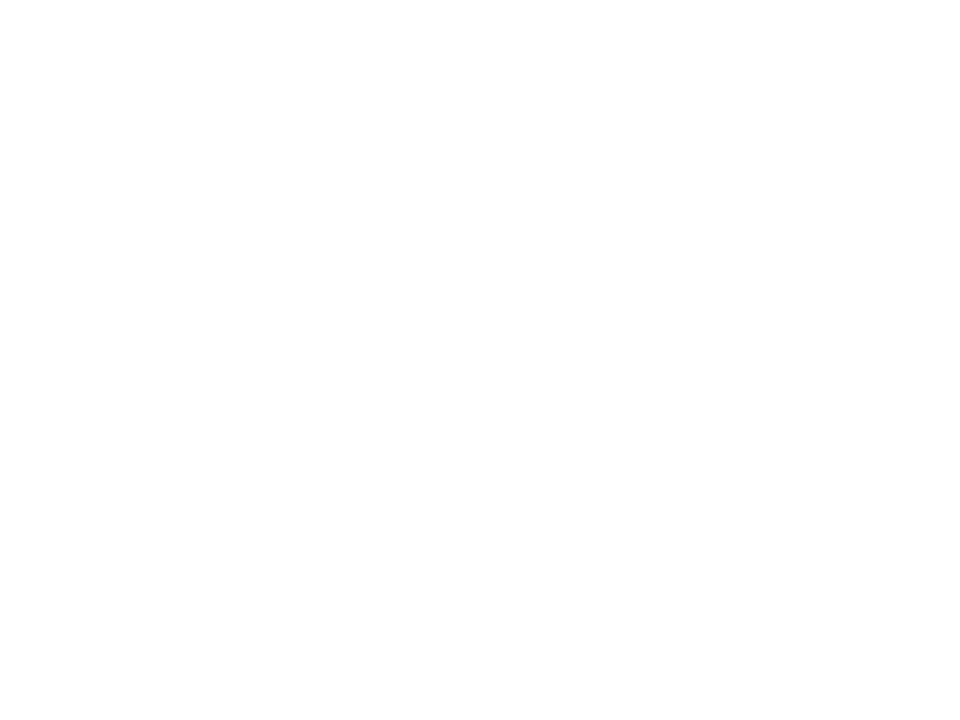

<IPython.core.display.Javascript object>


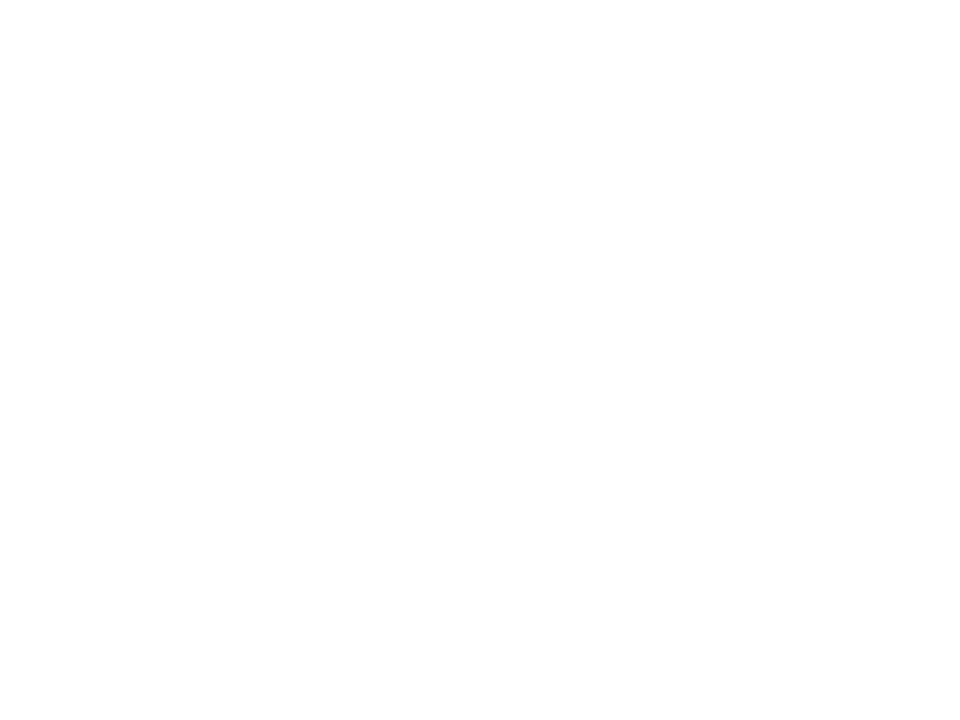

In [247]:
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

<IPython.core.display.Javascript object>


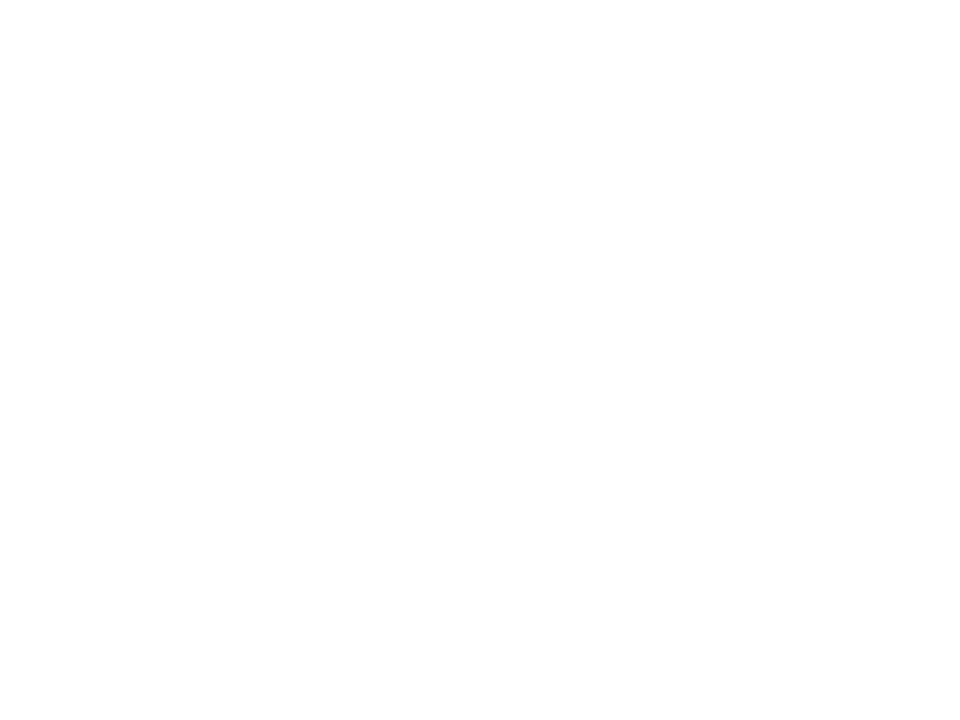

<IPython.core.display.Javascript object>


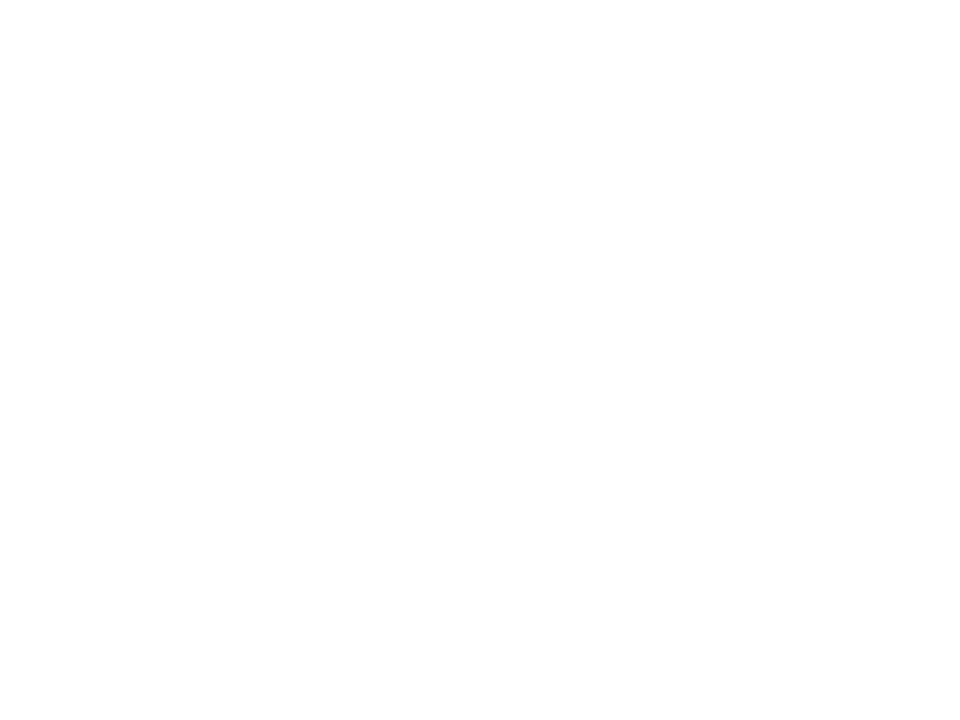

In [248]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)
X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
cmap='viridis', edgecolor='none');

<IPython.core.display.Javascript object>


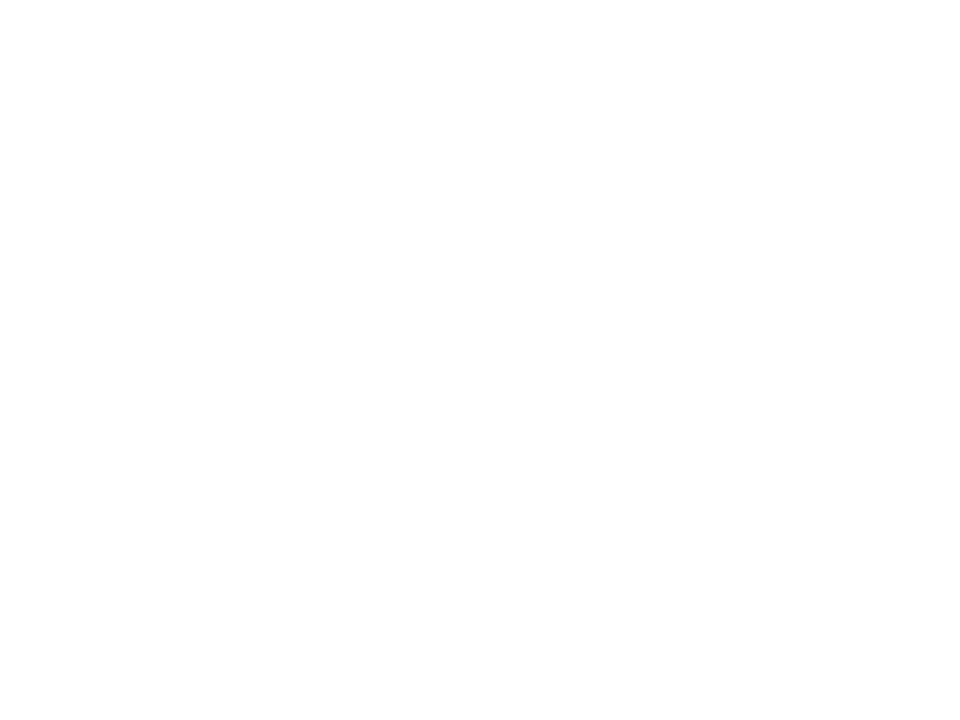

<IPython.core.display.Javascript object>


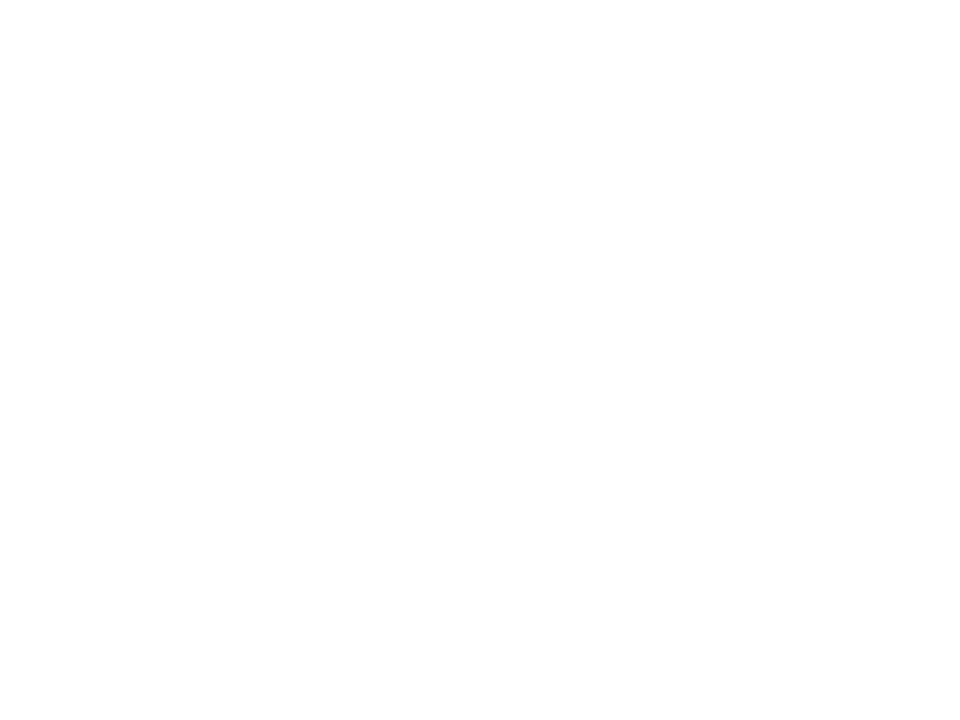

In [249]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

### Image

In [282]:
img = plt.imread("my_pic.png")

In [283]:
img.shape

(400, 600, 4)

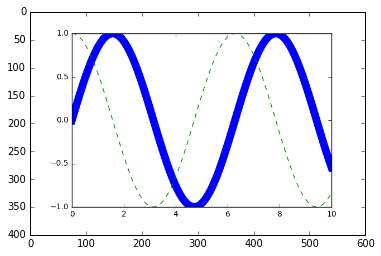

In [284]:
plt.imshow(img)

(-0.5, 599.5, 399.5, -0.5)

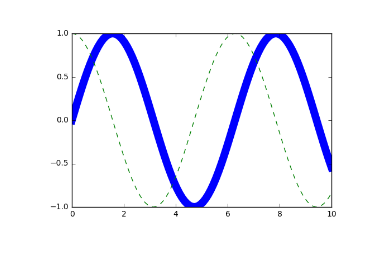

In [286]:
plt.imshow(img)
plt.axis('off')

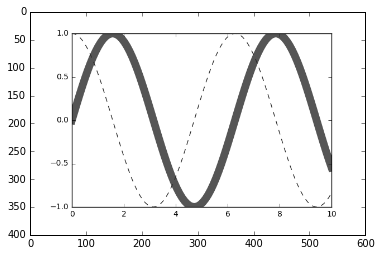

In [291]:
collapsed = img.mean(axis=2)
plt.imshow(collapsed, cmap='gray')

* Aspect ratio is ratio of height and width

In [292]:
pixels = img.flatten()

(array([3.62531245e-01, 9.67708319e-03, 8.76041588e-03, 9.25000055e-03,
        9.08333387e-03, 1.24895804e-02, 1.20833377e-02, 1.09791640e-02,
        1.04822954e-01, 9.46032066e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

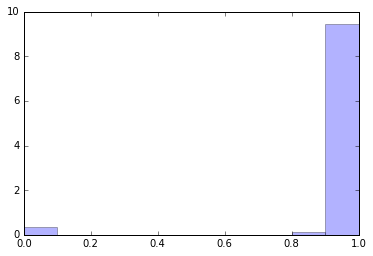

In [294]:
plt.hist(pixels, normed=True, color='b',alpha=0.3)

### Scatter matrix plot
* Combines both scatter and histogram.
```
from pandas.plotting import scatter_matrix
scatter_matrix(df[['col1', 'col2']], figsize = (10,10))
```
* If we pass 3 columns, it will be 3 by 3 matrix plot

### Discrete numeric data

In [295]:
die_rolls = np.random.randint(1,13, 100)

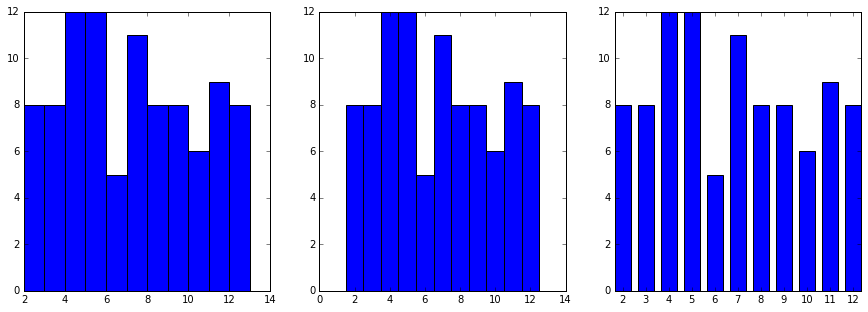

In [306]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15,5)

bin_edges = np.arange(2, 12+1.1, 1)
axes[0].hist(die_rolls, bins=bin_edges)
plt.xticks(np.arange(2, 12+1, 1))

bin_edges = np.arange(1.5,12.5+1,1)
axes[1].hist(die_rolls, bins=bin_edges)
plt.xticks(np.arange(2,12+1,1));

axes[2].hist(die_rolls, bins=bin_edges, rwidth=0.7)
plt.xticks(np.arange(2,12+1,1));

* with `rwidth` 0.7, bars will take up 70% of the space allocated by each bin, with 30% of the space left empty.

### Zoom in data to see the clear picture

In [308]:
pokemon = pd.read_csv("../pokemon.csv")

In [309]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


(0, 6)

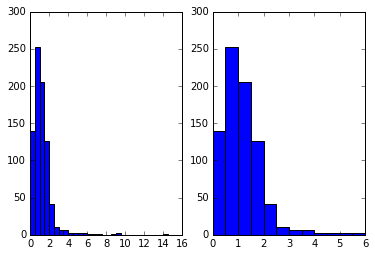

In [312]:
fig, axes = plt.subplots(1,2)
bins = np.arange(0, pokemon.height.max() + 0.5, 0.5)
axes[0].hist(data=pokemon, x="height", bins=bins)

#### Zoomed version
axes[1].hist(data=pokemon, x="height", bins=bins)
axes[1].set_xlim((0,6))

### Scaling
* Data for example home price, which has many order of magnitude and skewed to the right. Which has lots of gaps to catch the highest values.
* With linear predictive model it is difficult to catch small difference at lower end and large difference at higher end
* Log scale will represent multiplicative difference rather than arithmetic difference. Linear changes in predictive feature will result in multiplicative changes in price.
* All value should be positive to apply it. Going left will divide value by 2, going right will multiply value by 2.
* As a result we get log normal distribution, where data looks in normal shape after a log transform.
* It allows us to interpret data in natural recording unit, if instead we take apply transformation to data, interpreting the value will become hard. we have to apply inverse transformation, 40000 become 4.6, and we have to think 10^4.6 is 40000

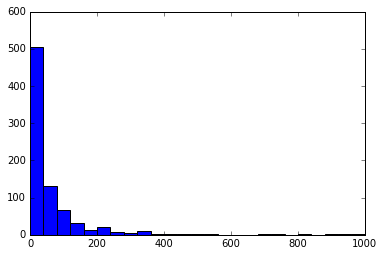

In [313]:
bins = np.arange(0, pokemon.weight.max()+40, 40)
plt.hist(data=pokemon, x='weight', bins=bins);

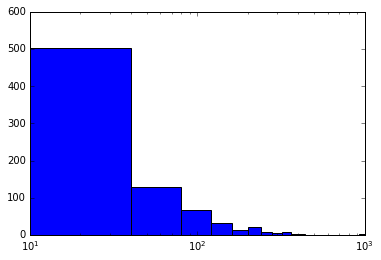

In [314]:
bins = np.arange(0, pokemon.weight.max()+40, 40)
plt.hist(data=pokemon, x='weight', bins=bins)
plt.xscale('log');

* Above graph has wider bins in left than right because they have multiplicative difference

In [318]:
log_weight = np.log10(pokemon.weight)

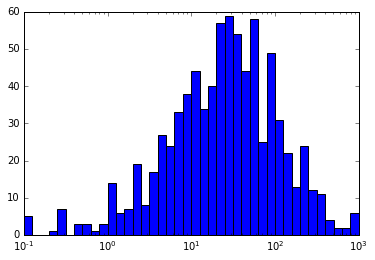

In [319]:
bins = 10 ** np.arange(log_weight.min(), log_weight.max() + 0.1, 0.1)
plt.hist(data=pokemon, x='weight', bins=bins)
plt.xscale('log');

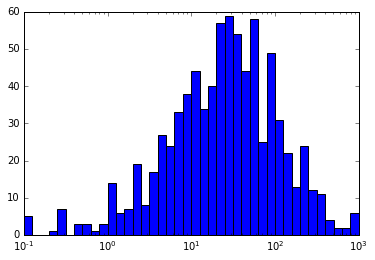

In [323]:
bins = 10 ** np.arange(log_weight.min(), log_weight.max() + 0.1, 0.1)
plt.hist(data=pokemon, x='weight', bins=bins)
ticks = [0.1,0.3,0,3,10,30,100,300,1000] # 0.3, 30, 300 are halfway value in log
tick_labels = [str(v) for v in ticks]
plt.xticks(ticks, tick_labels);
plt.xscale('log');

* a raw value of 1000 becomes a value of 3 under log transform, and a raw value of 100 becomes a log-transformed value of 2.

* Applying custom transformation

```
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

bin_edges = np.arange(0, sqrt_trans(data.max())+1, 1)
plt.hist(data.apply(sqrt_trans), bins = bin_edges)
tick_locs = np.arange(0, sqrt_trans(data.max())+10, 10)
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int))
```

* The main difference between suptitle and title is that the former sets a title for the Figure as a whole, and the latter for only a single Axes. This is an important distinction: if you're using faceting or subplotting, you'll want to usesuptitle to set a title for the figure as a whole.